In [171]:
data = pd.read_csv('ins_fraud.csv')
data.head()

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,0,2,1,3,0,2,0,100,2,0,...,0,1,0,0,1,0,0,0,-1,0
1,0,1,0,4,0,4,0,0,3,1,...,0,1,1,1,2,1,1,1,0,1
2,0,1,0,4,1,4,0,100,3,1,...,12925040,3,1,0,2,1,1,1,0,1
3,0,3,1,3,0,4,0,0,2,0,...,0,3,1,0,1,0,0,0,-1,0
4,0,1,0,1,0,1,0,100,1,0,...,1209410,1,0,0,2,0,0,0,-1,0


In [ ]:
'''
fraud:1 if fraud 0 if not 
c1 '경형','소형','소형SUV' : 1 / '준중형','준중형SUV','중형' : 2 / '대형','승합','준대형','중형SUV' : 3 / '수입' : 4 / 'EV','RV' : 5
c2부름: 1, 쏘카: 0 (?)
c3 age 21 : 1 / 23 : 2 / 27 : 3 / 31 : 4 / 41 : 5
c4 누적 사고 유무 : 1 if yes, 0 if not
c5 누적 대여 횟수 1 : 1 / (2,3,4,5) : 2 / (6,7,8,9,10) : 3 / 10+ : 4 / else 0
c6 법인이용 개인 고객 = 0 / 법인 = 1 / 법인 구성원 = 2
c7 과실율 unique = 100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75, 50,  15,  65,  25
c8 보험료 타입 선택 PF5 : 1 / PF30 : 2 / PF70 : 3 / else 0
c9 쏘카패스: yes 1 no 0
c10 쏘카세이브: yes 1 no 0 
c11 이용시작시간: (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6
c12 대여기간 (2,3,4,5) : 1 / (6,7,8,9) : 2 / (10 =< x <=36) : 3 / (36+) : 4 / (0,1) : 5
c13 사고시각 (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6 / else -1
c14 차량수리비용
c15 보험손해비용
c16 사고위치: 0주차장 1일반도로 2이면도로 3고속도로 4쏘카존 5확인불가
c17 전면 손상 if(a1 = 1, 1, 0) a1, -- 앞범퍼
c18 후면 손상 if(a10 = 1, 1, 0) a10, -- 뒷범퍼
c19 수리 부위 갯수
c20 사고타입: 사고 유형1 : 차대인(10) 차대차(20) 차량단독(30) 보행중(40) 자전거(50) 기타(99)
c21 보험사 현장출동 유무 Yes 1 no 2 else 0 
c22 경찰 현장출동 유무 1 미신고 / 2 신고 / else 0
c23 우리차 탑승 인원 ("0","1","2","3","4"), 5이상: 5, 미확인=-1 
c24 test_set 1 if train 0 if test 
'''

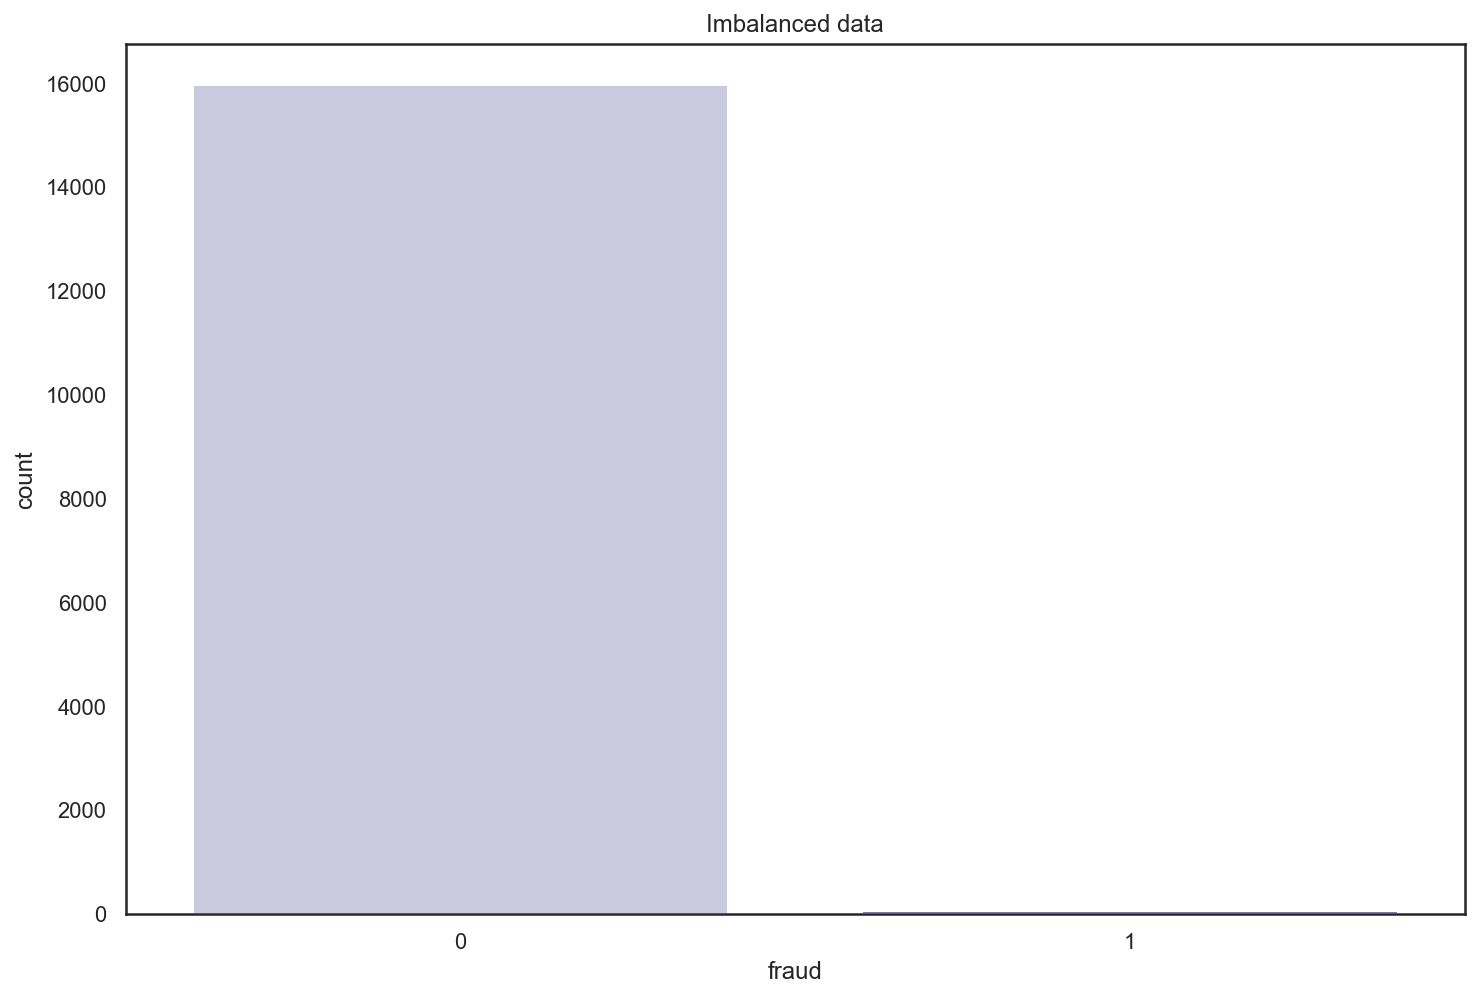

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Imbalanced data')
sns.countplot(data["fraud"], palette="Purples")
plt.show()

<Figure size 432x288 with 0 Axes>

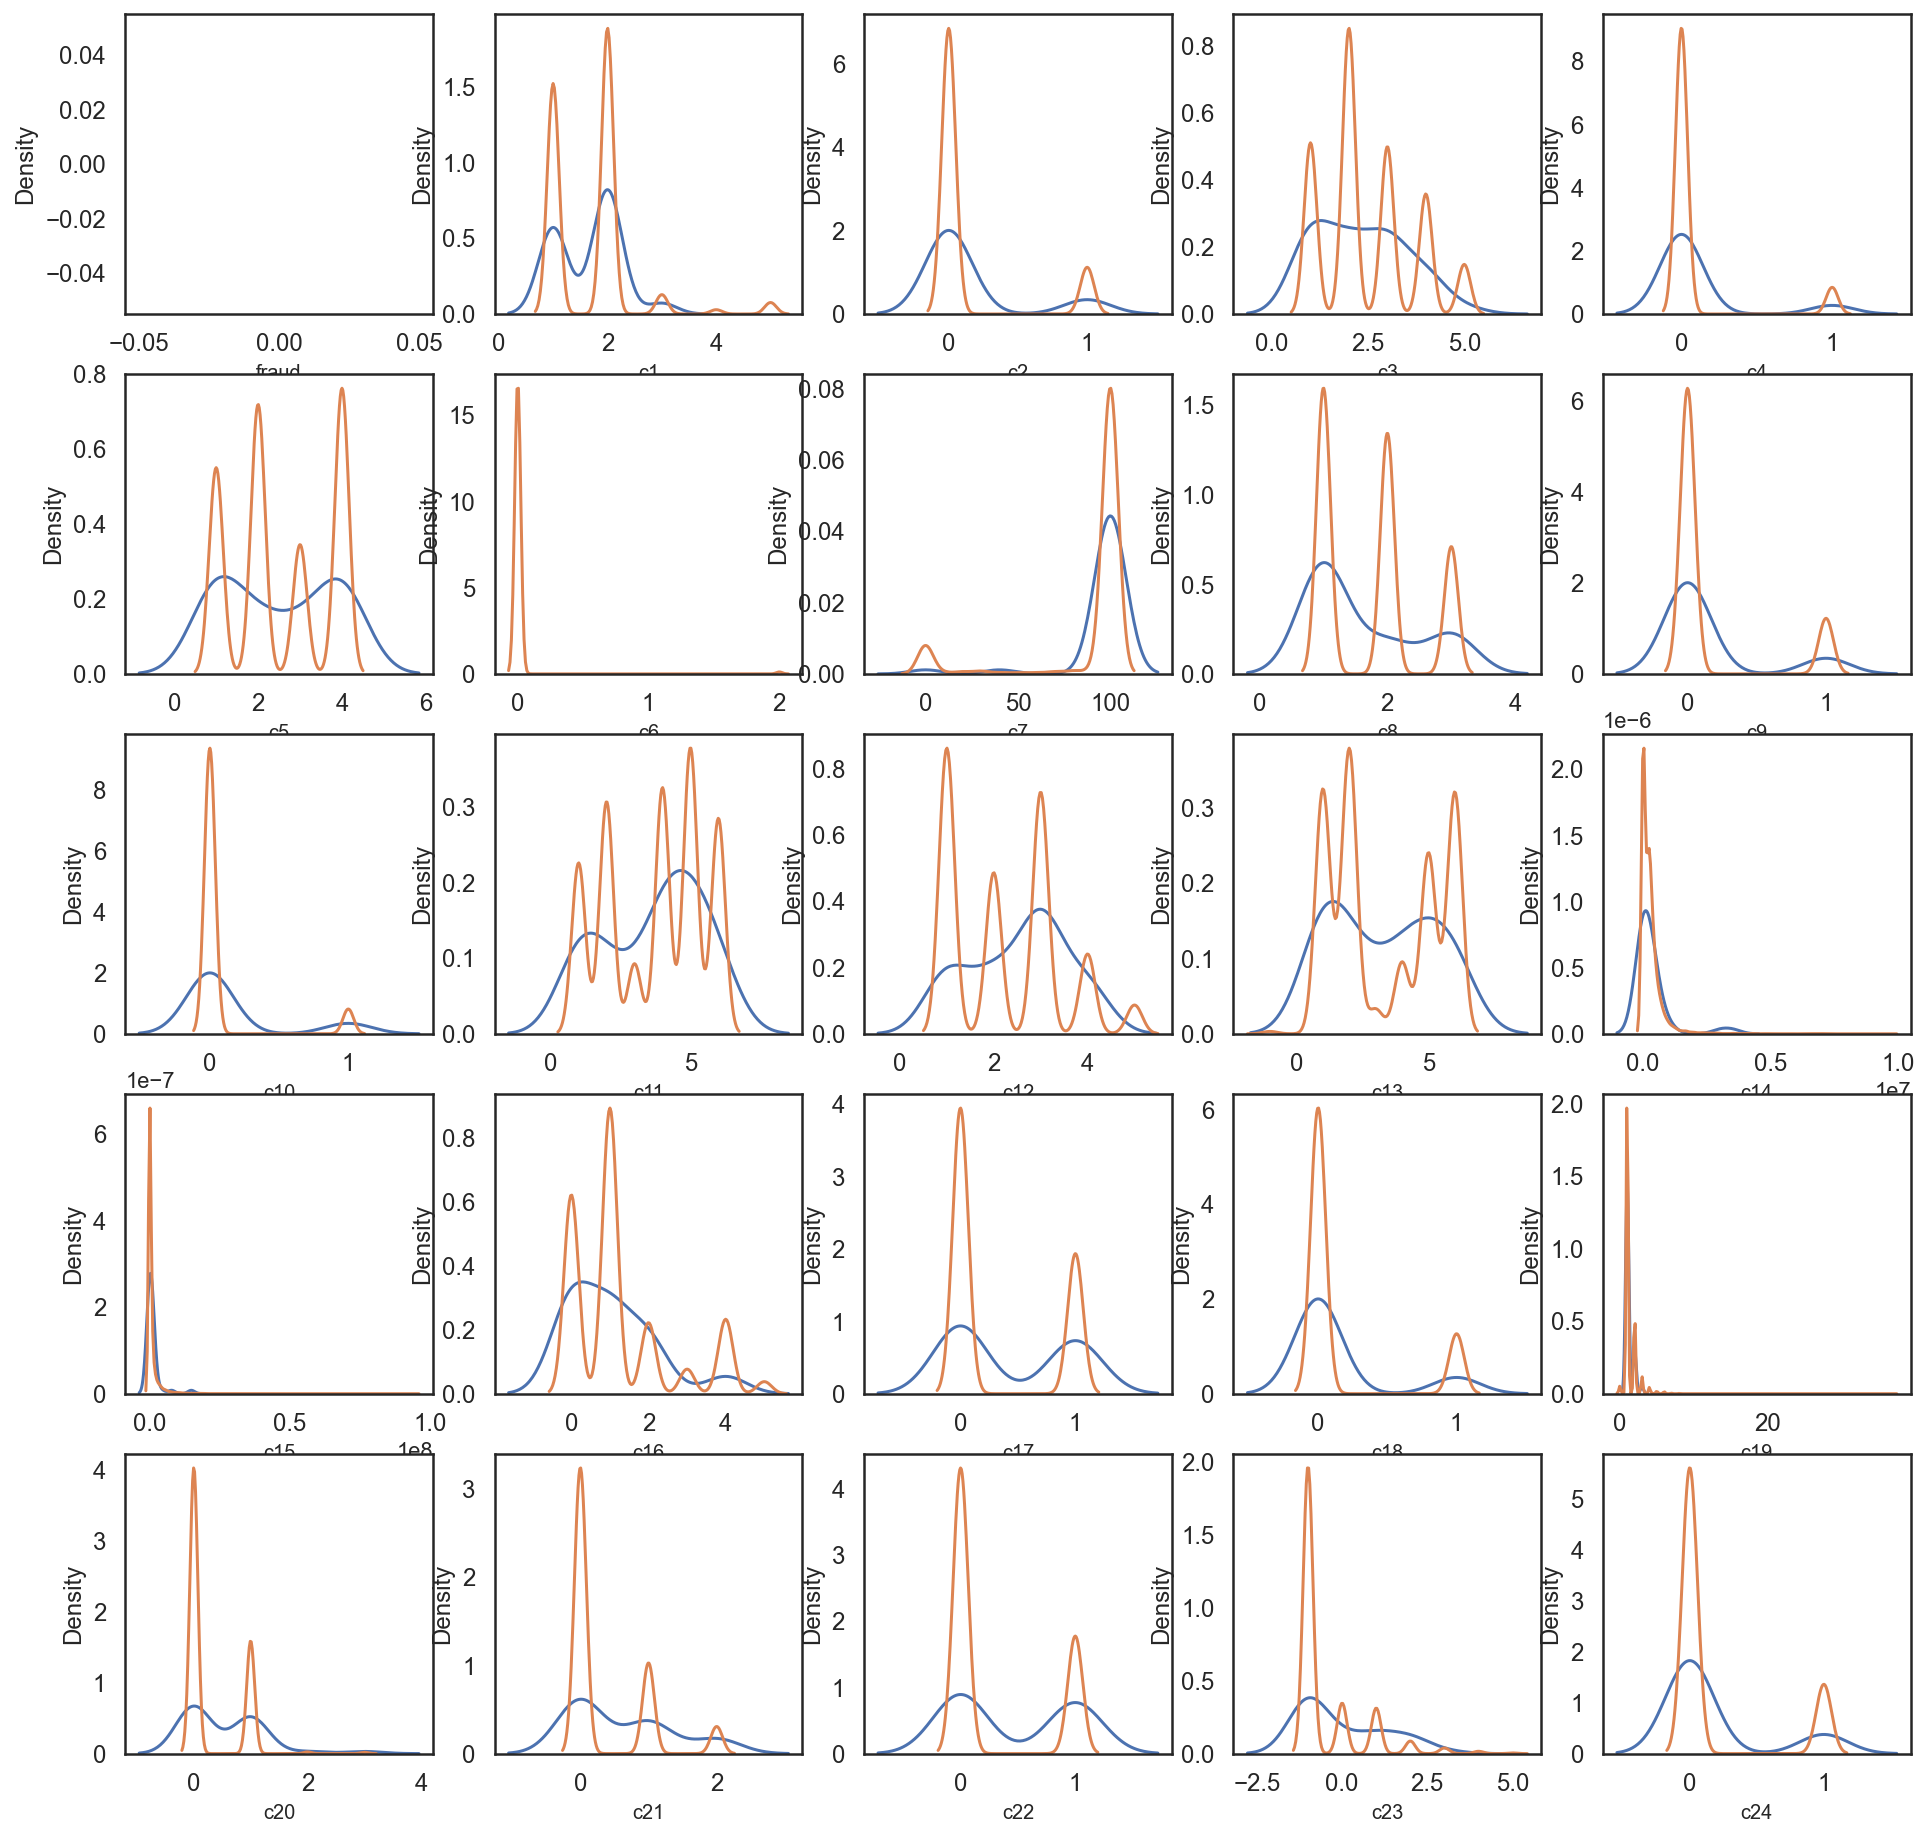

In [24]:
column_names = list(data.columns.values)
frauds = data[data['fraud'] == 1]
no_frauds = data[data['fraud'] == 0]

plt.figure()
fig, ax = plt.subplots(4,4,figsize=(16,16))
i = 0
for feature in column_names:
    i += 1
    plt.subplot(5,5,i)
    sns.kdeplot(frauds[feature])
    sns.kdeplot(no_frauds[feature])
    plt.xlabel(feature, fontsize=10)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

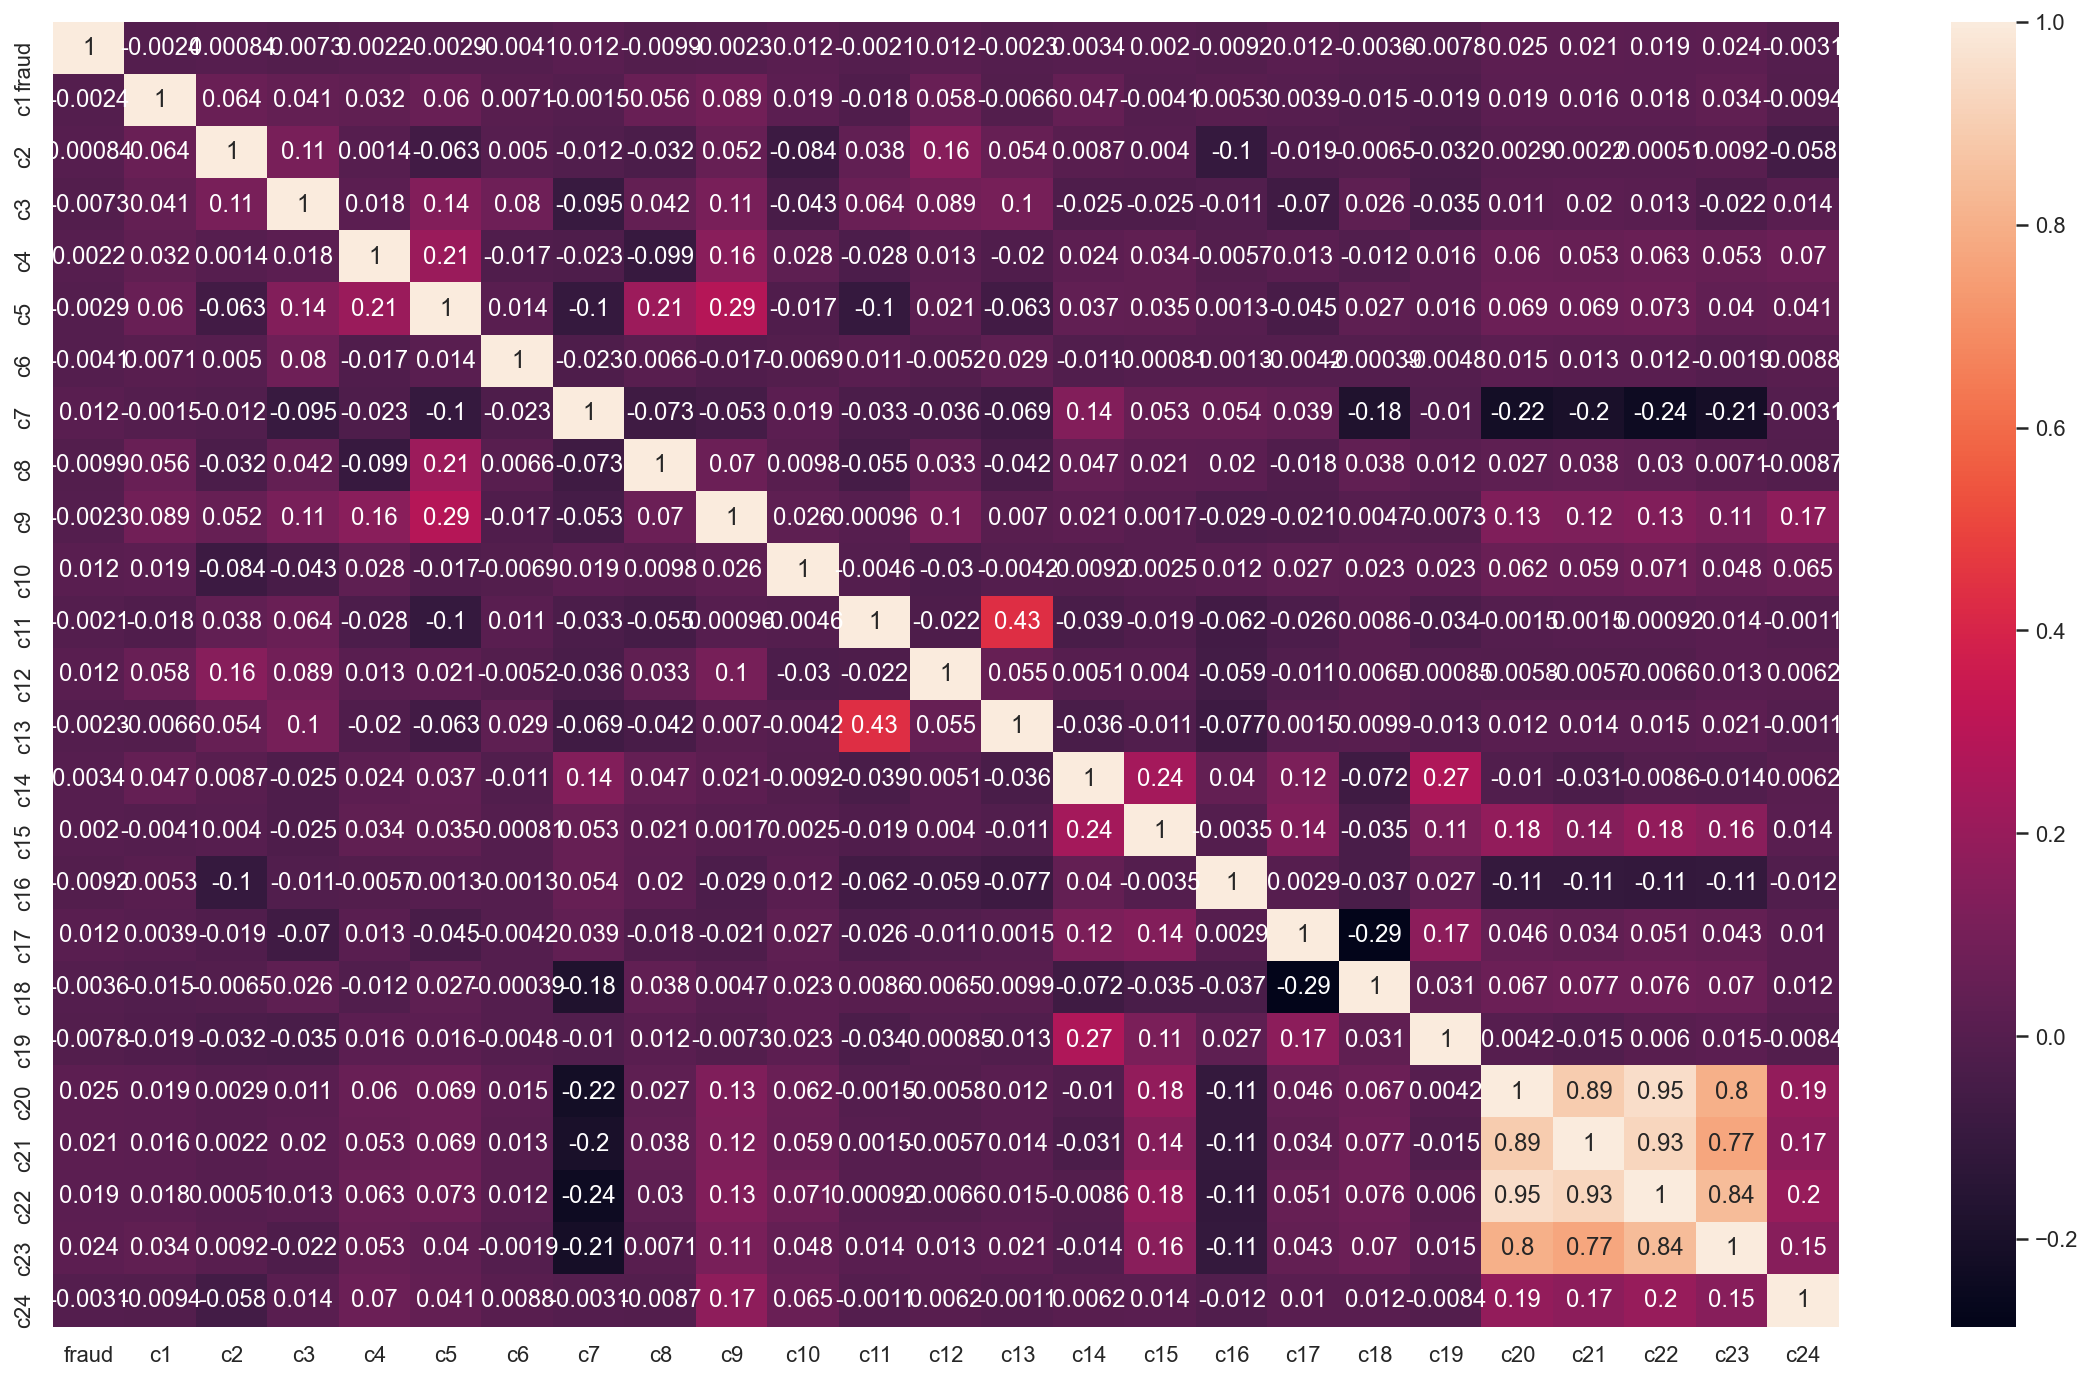

In [27]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

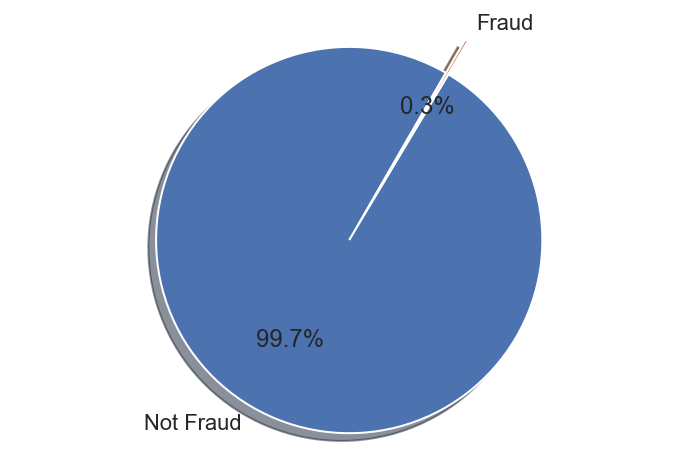

In [28]:
#visualizing in pie chart
labels = 'Not Fraud', 'Fraud'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(data['fraud'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

# 컬럼별 분석해보기 

In [ ]:
# c1 '경형','소형','소형SUV' : 1 / '준중형','준중형SUV','중형' : 2 / '대형','승합','준대형','중형SUV' : 3 / '수입' : 4 / 'EV','RV' : 5
# 차종이 관련 있을 것이다. 

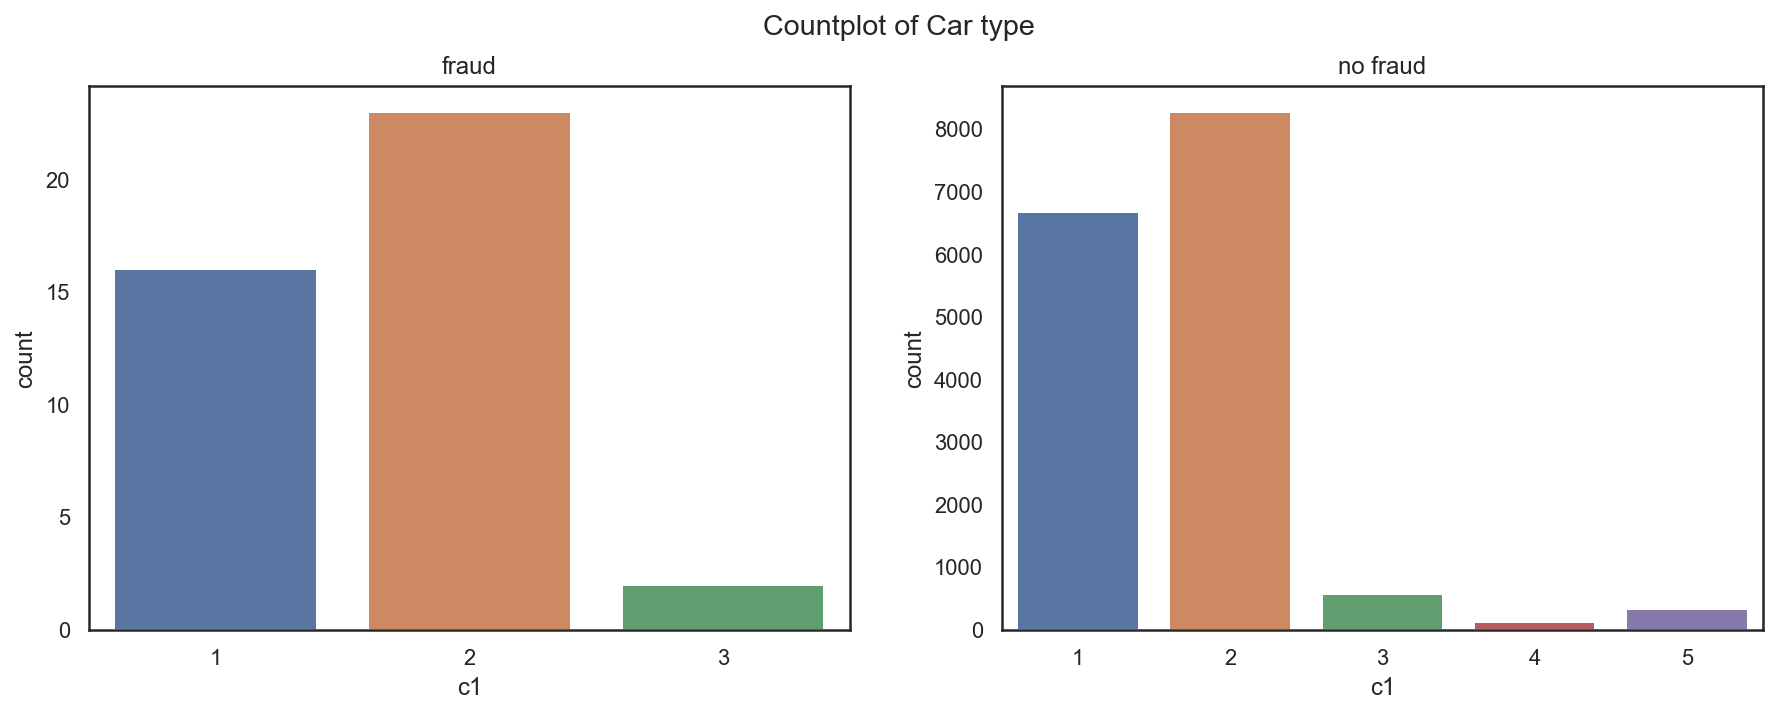

In [121]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of Car type')
sns.countplot(data[data["fraud"]==1]["c1"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c1"], ax=axs[1]).set_title("no fraud")
fig.show()

# fraud의 차종은 경형, 소형, 준형, 대형밖에 없었다. 수입과 EV, RV를 빼도 되지 않을까..? 
# distribution은 비슷했다. 

In [ ]:
# c2부름: 1, 쏘카: 0

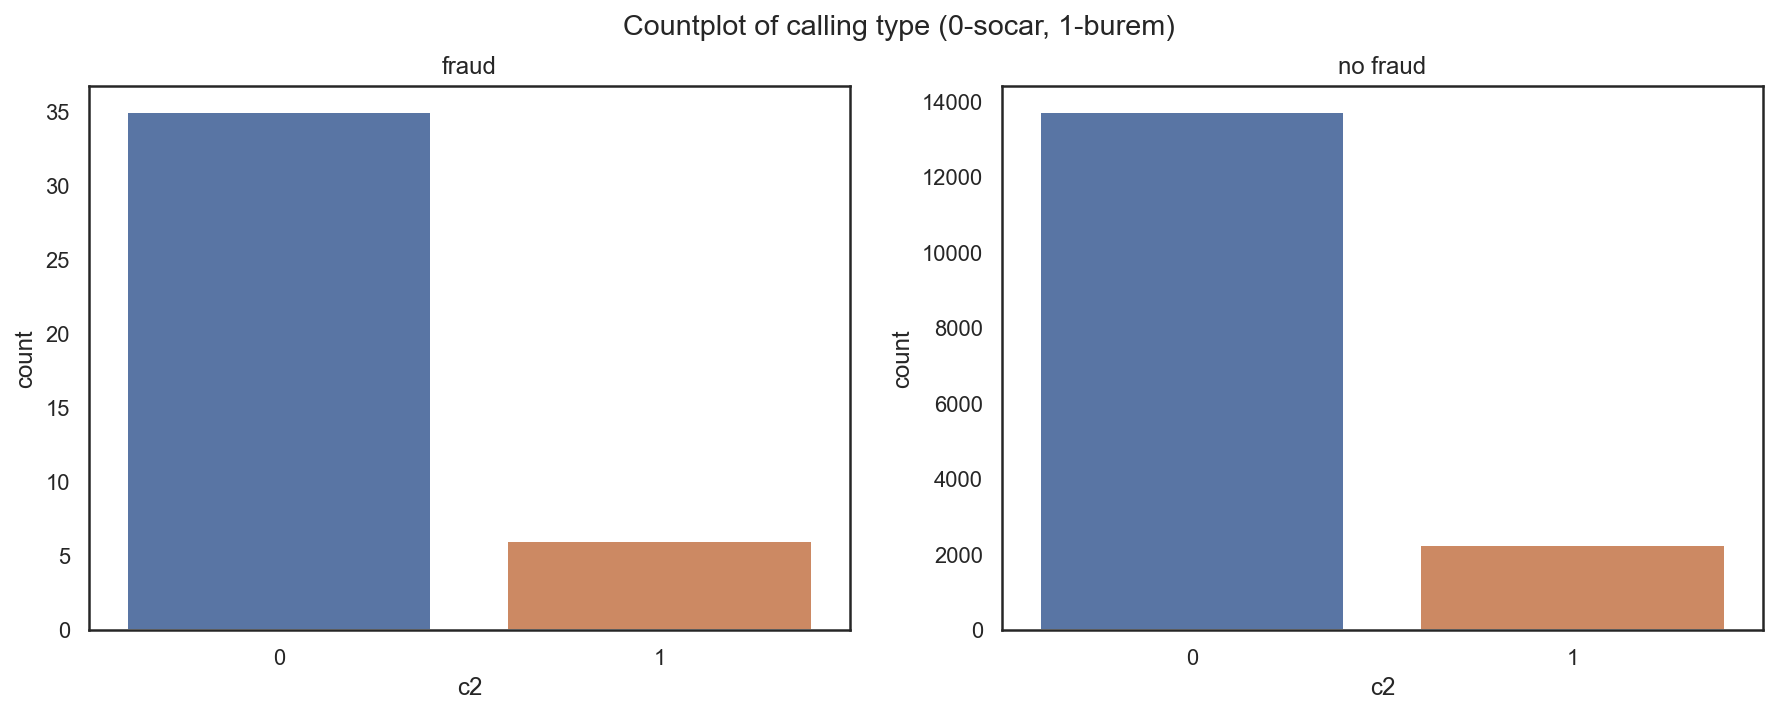

In [122]:
# 별 의미가 없는 것 같다... 

plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of calling type (0-socar, 1-burem)')
sns.countplot(data[data["fraud"]==1]["c2"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c2"], ax=axs[1]).set_title("no fraud")
fig.show()

In [ ]:
# c3 age 21 : 1 / 23 : 2 / 27 : 3 / 31 : 4 / 41 : 5

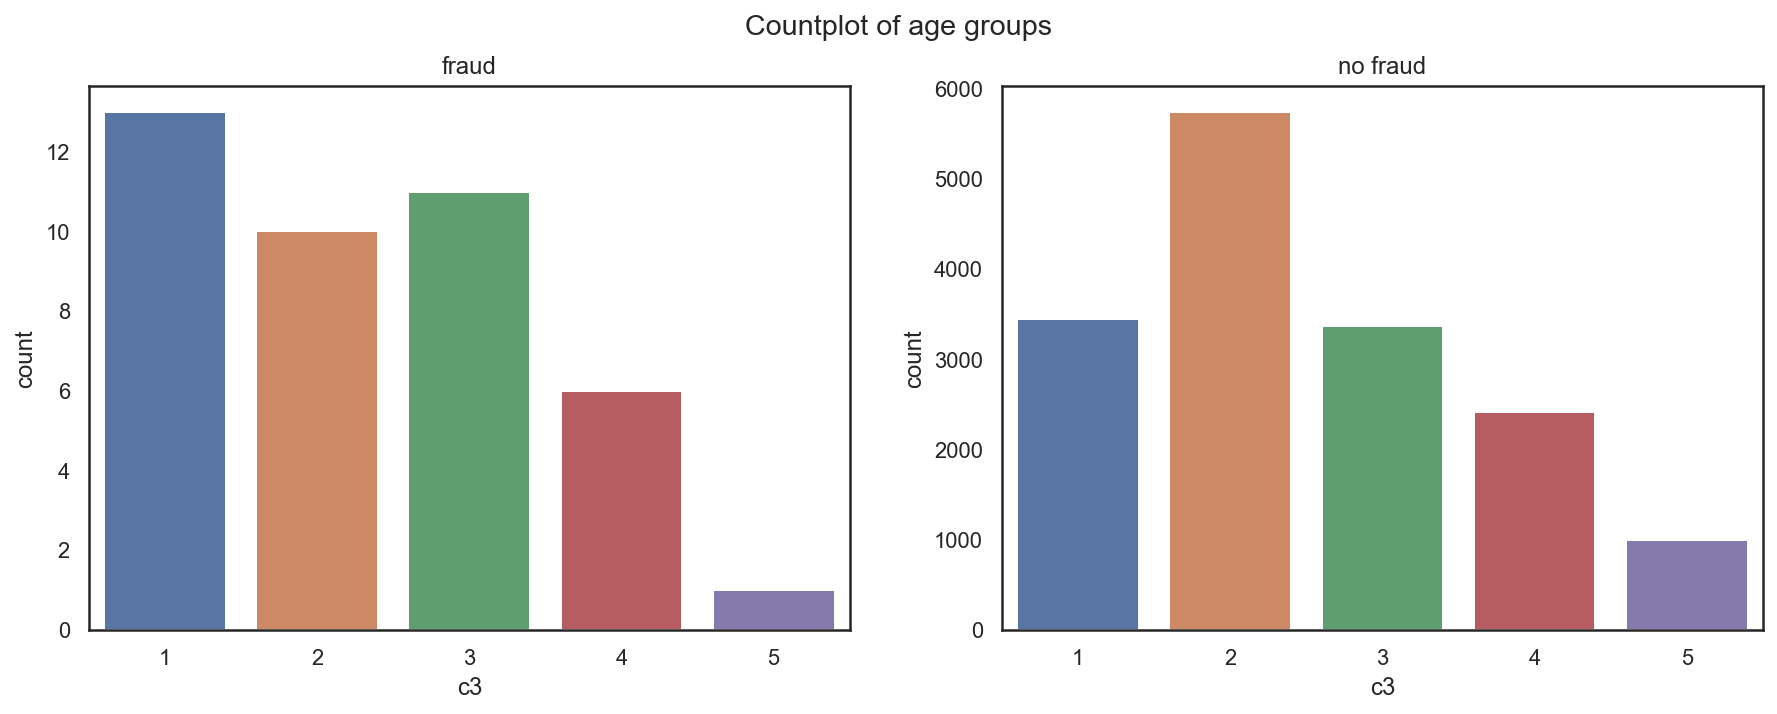

In [123]:
# 나이와 관련이 있지 않을까? 
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of age groups')
sns.countplot(data[data["fraud"]==1]["c3"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c3"], ax=axs[1]).set_title("no fraud")
fig.show()
# 역시 데이터가 너무 적다ㅜㅜ 그래도 21살이 가장 많다 

In [ ]:
# c4 누적 사고 유무 : 1 if yes, 0 if not

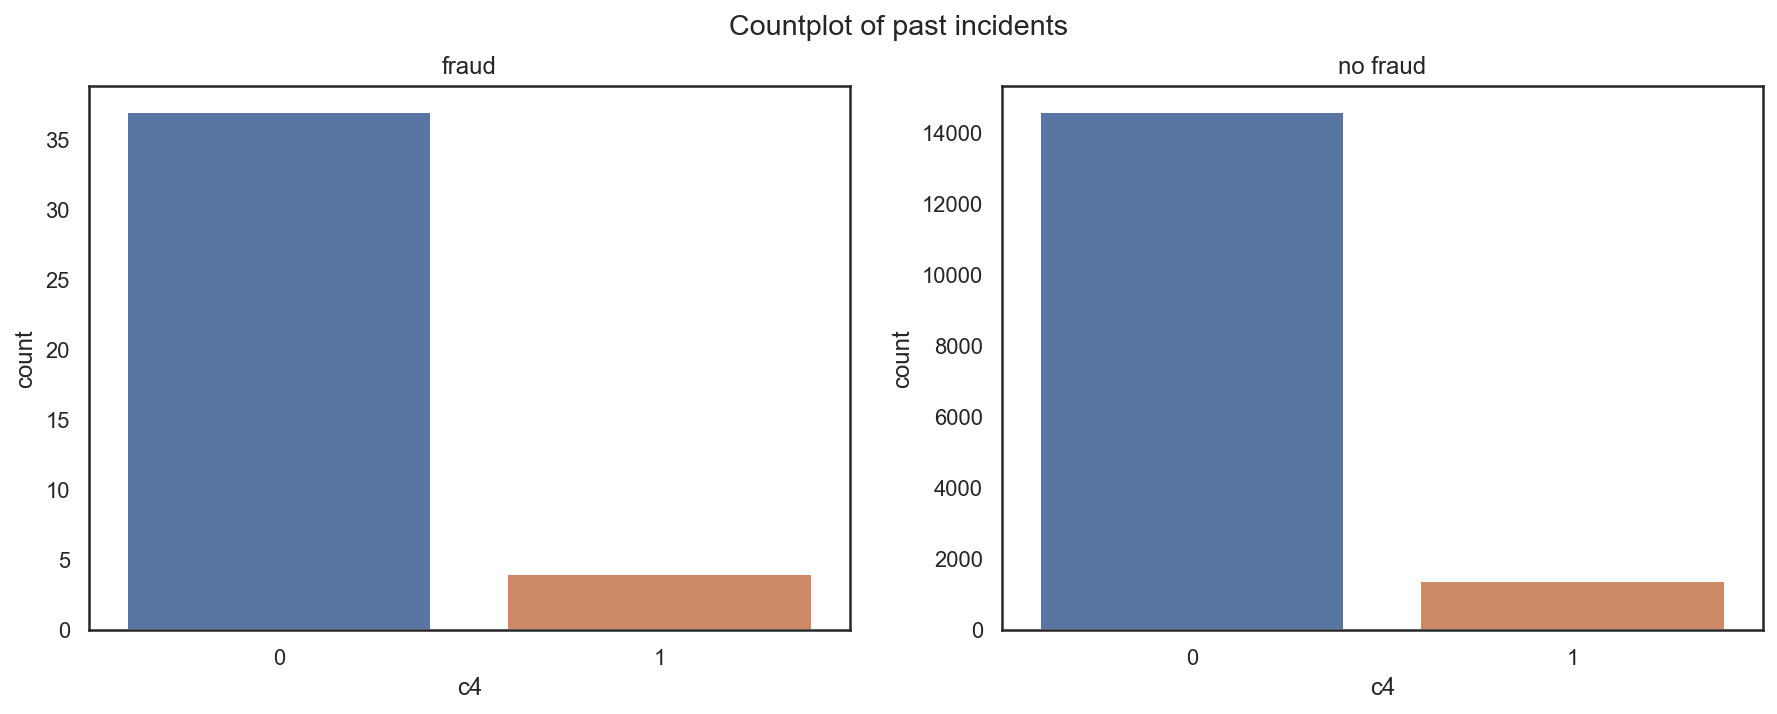

In [124]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of past incidents')
sns.countplot(data[data["fraud"]==1]["c4"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c4"], ax=axs[1]).set_title("no fraud")
fig.show()
# 분포도가 비슷한 걸 보니 별 의미가 없어보인다... 

In [116]:
# c5 누적 대여 횟수 1 : 1 / (2,3,4,5) : 2 / (6,7,8,9,10) : 3 / 10+ : 4 / else 0

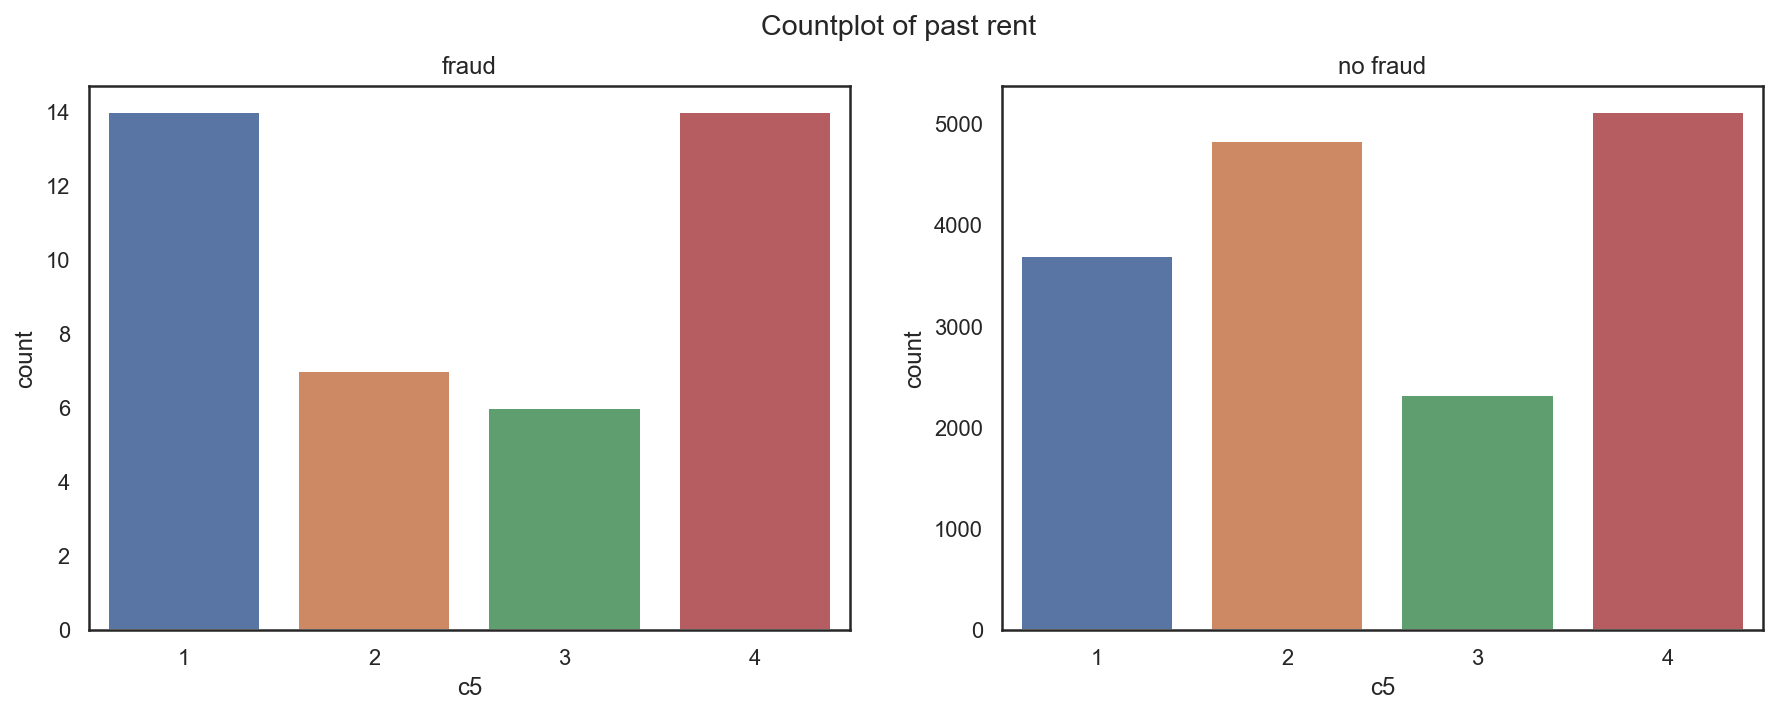

In [161]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of past rent')
sns.countplot(data[data["fraud"]==1]["c5"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c5"], ax=axs[1]).set_title("no fraud")
fig.show()
# 처음이나 모르는게 가장 많다. 6,7,8,9,10 번 대여한 사람이 훨씬 적다. 

In [119]:
# c6 법인이용 개인 고객 = 0 / 법인 = 1 / 법인 구성원 = 2

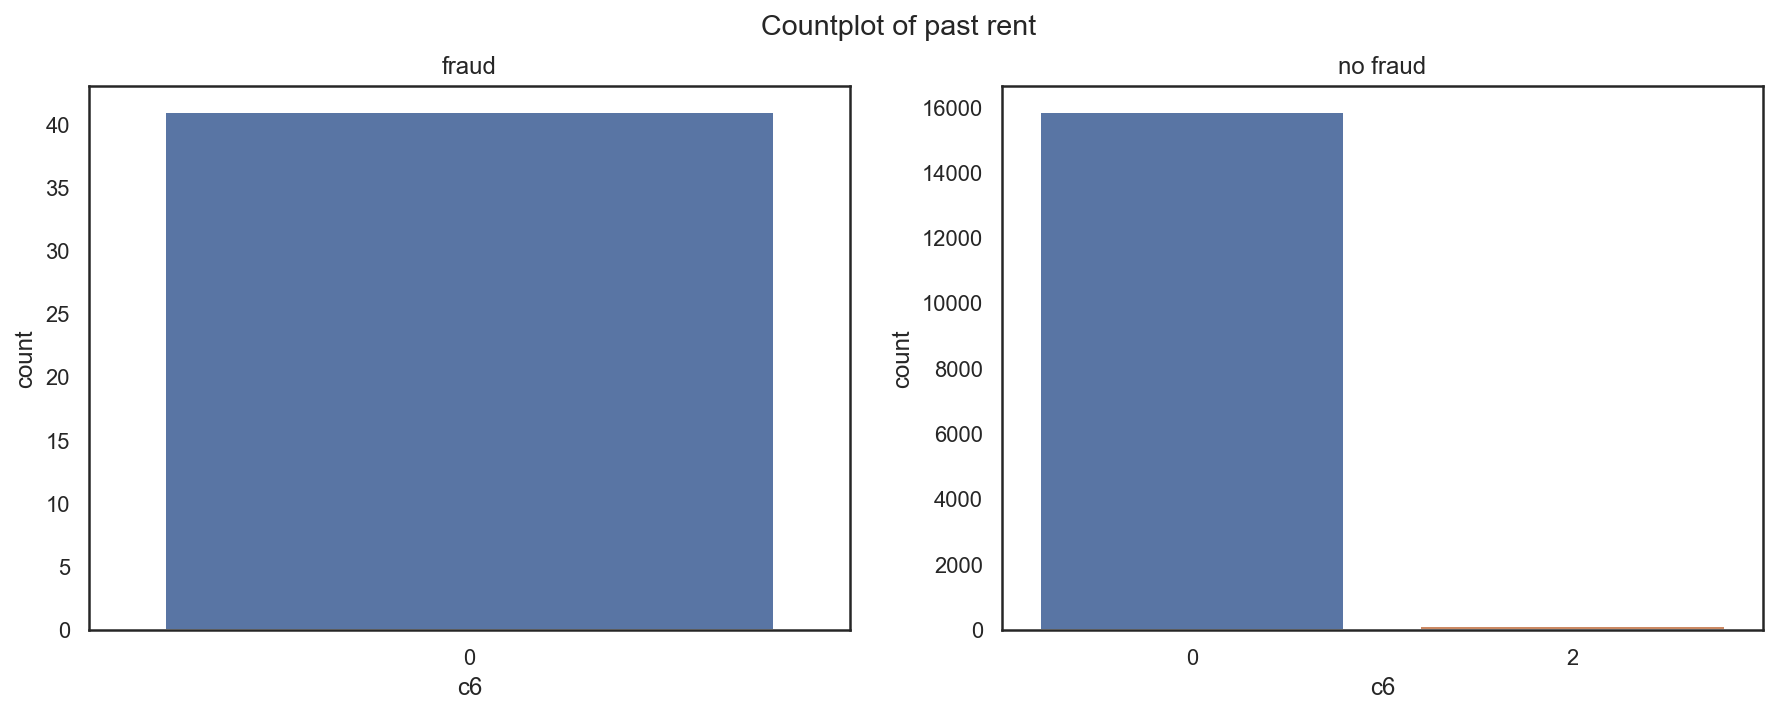

In [120]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of past rent')
sns.countplot(data[data["fraud"]==1]["c6"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c6"], ax=axs[1]).set_title("no fraud")
fig.show()
# 법인 구성원은 전부 드롭해도 될 것 같다... 

In [ ]:
# c7 과실율 unique = 100,   0,  90,  55,  30,  80,  40,  10,  70,  20,  60,  85,  75, 50,  15,  65,  25

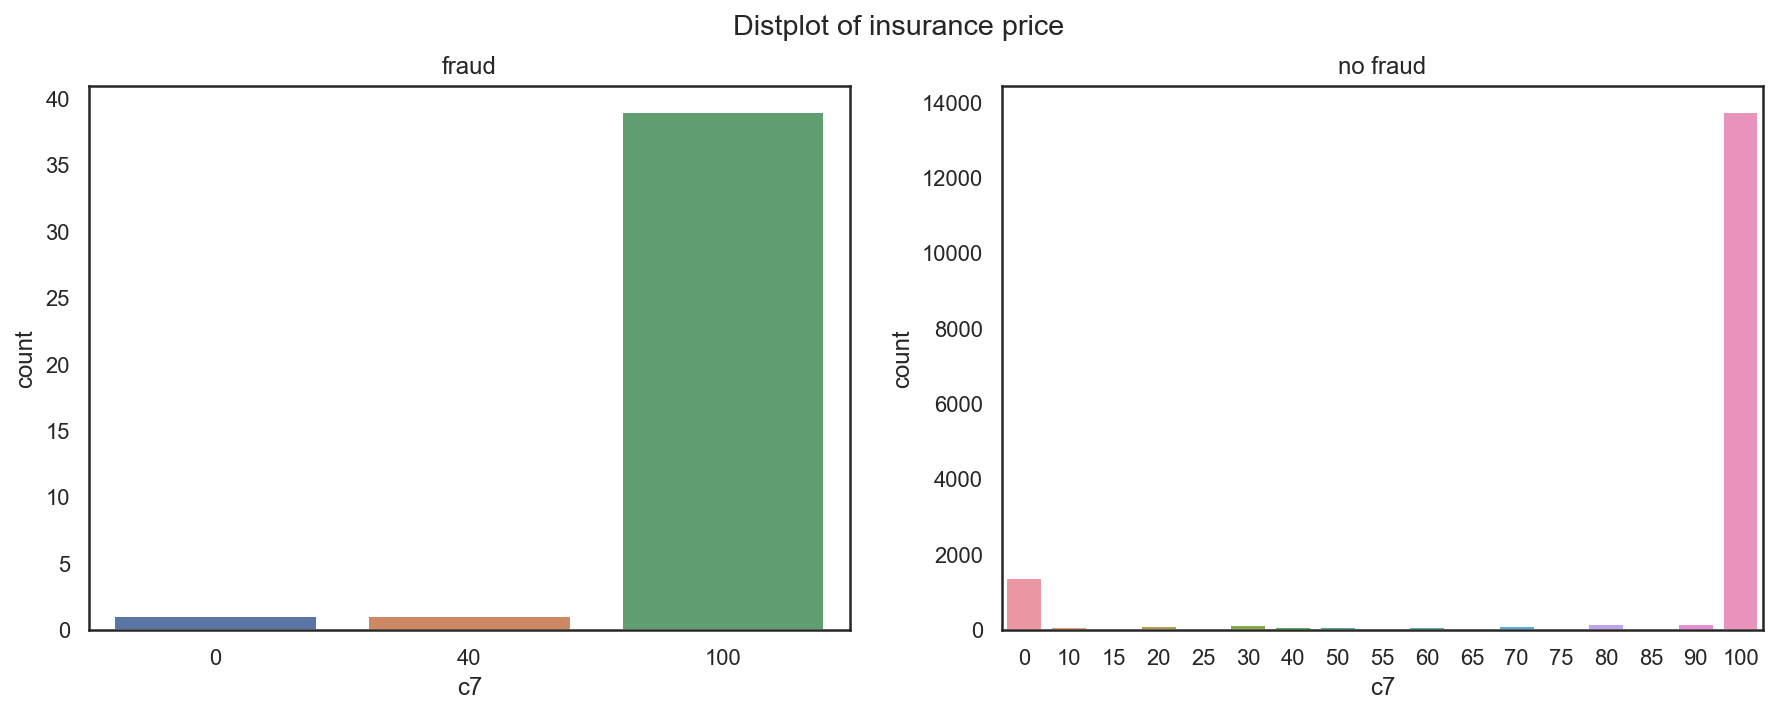

In [170]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Distplot of insurance price')
sns.countplot(data[data["fraud"]==1]["c7"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c7"], ax=axs[1]).set_title("no fraud")
fig.show()
# 과실율 100이 가장 많다. 40과 0은 각각 1개의 데이터밖에 없어서 처리를 해야할 수도...? 

In [8]:
# c8 보험료 타입 선택 PF5 : 1 / PF30 : 2 / PF70 : 3 / else 0
# 보험료 타입과 fraud는 관계가 있을 것이다
# 자기부담금 최대 5만원
# 자기부담금 최대 30만원
# 자기부담금 최대 70만원 

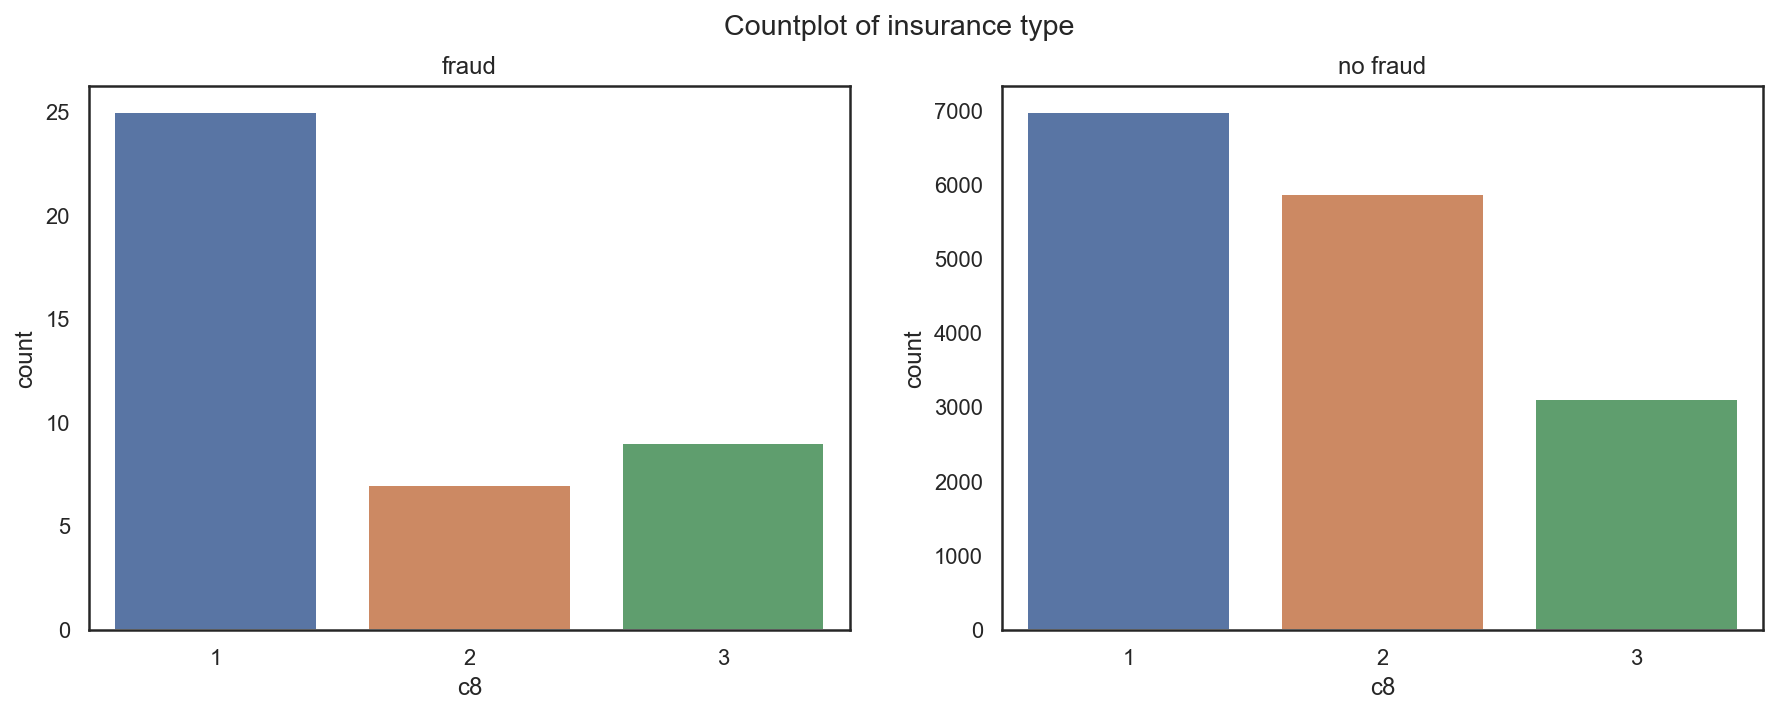

In [125]:
# 일단 count 해보기... 그런데 숫자가 너무 적어서 의미가 있을지 모르겠다 
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c8"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c8"], ax=axs[1]).set_title("no fraud")
fig.show()

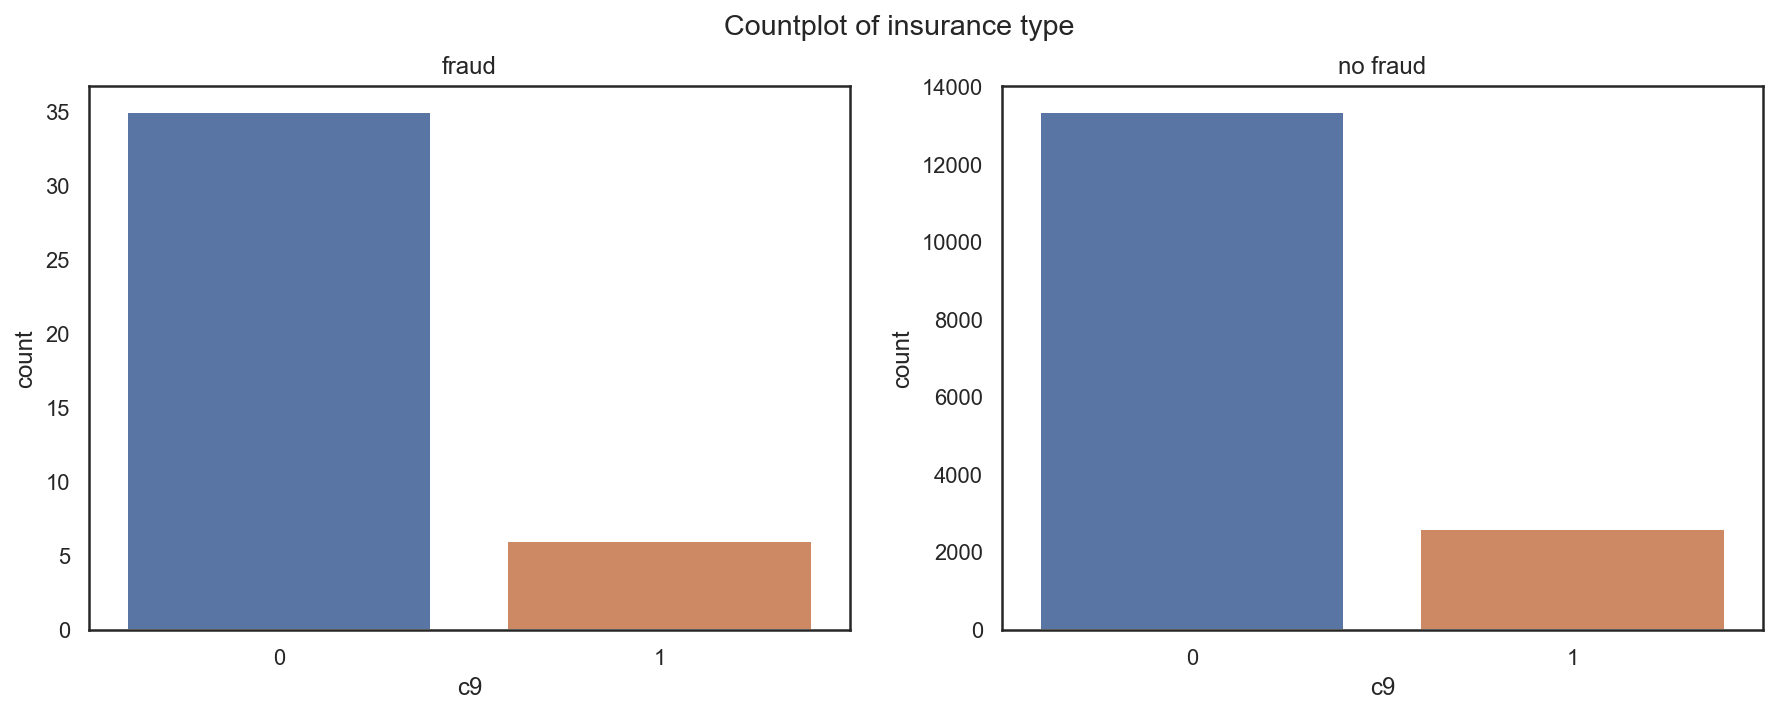

In [177]:
# c9 쏘카패스: yes 1 no 0
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c9"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c9"], ax=axs[1]).set_title("no fraud")
fig.show()

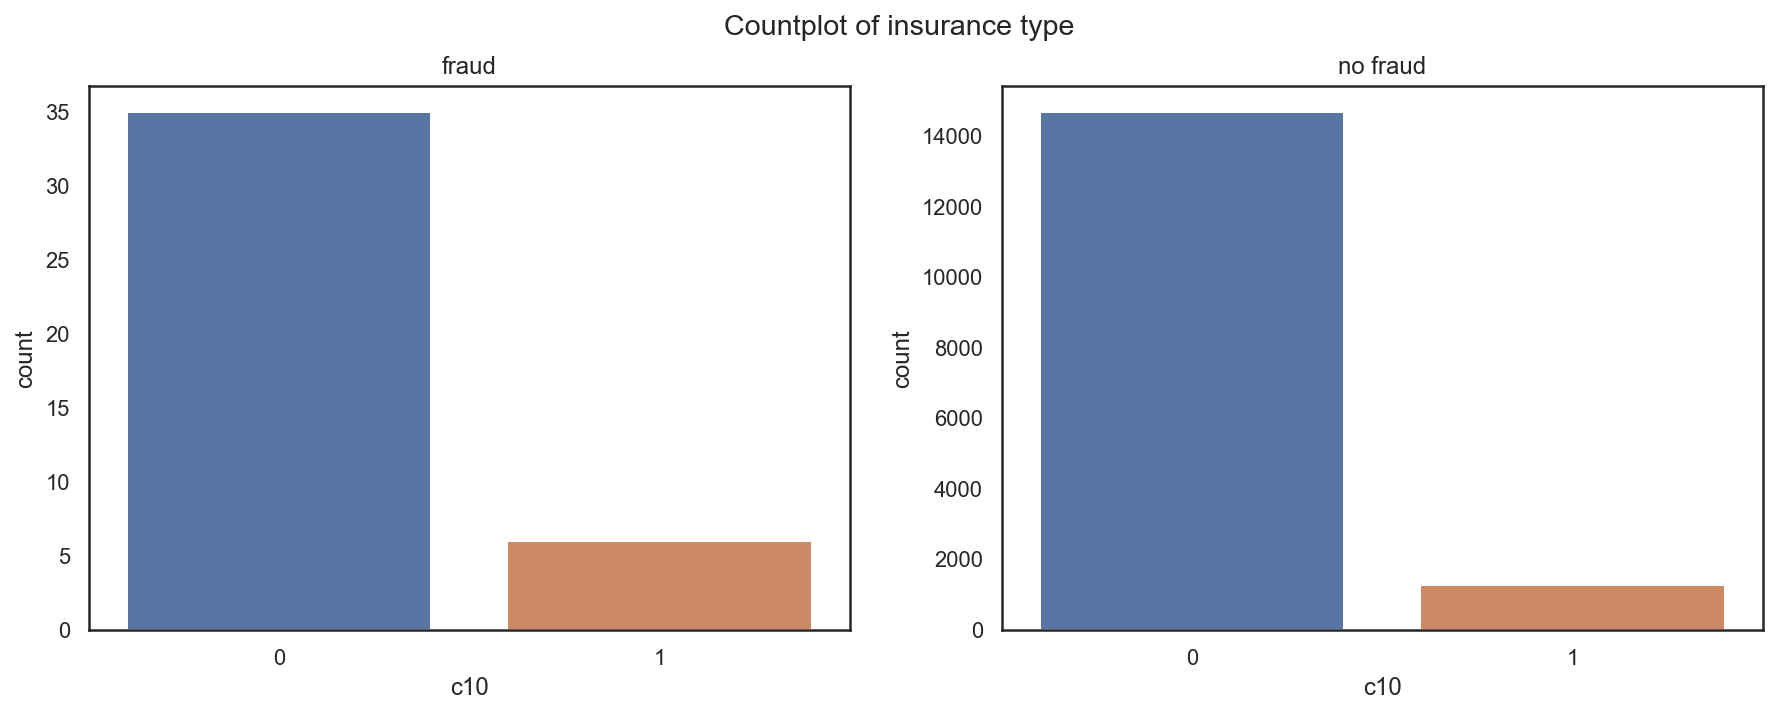

In [178]:
# c10 쏘카세이브: yes 1 no 0 
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c10"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c10"], ax=axs[1]).set_title("no fraud")
fig.show()

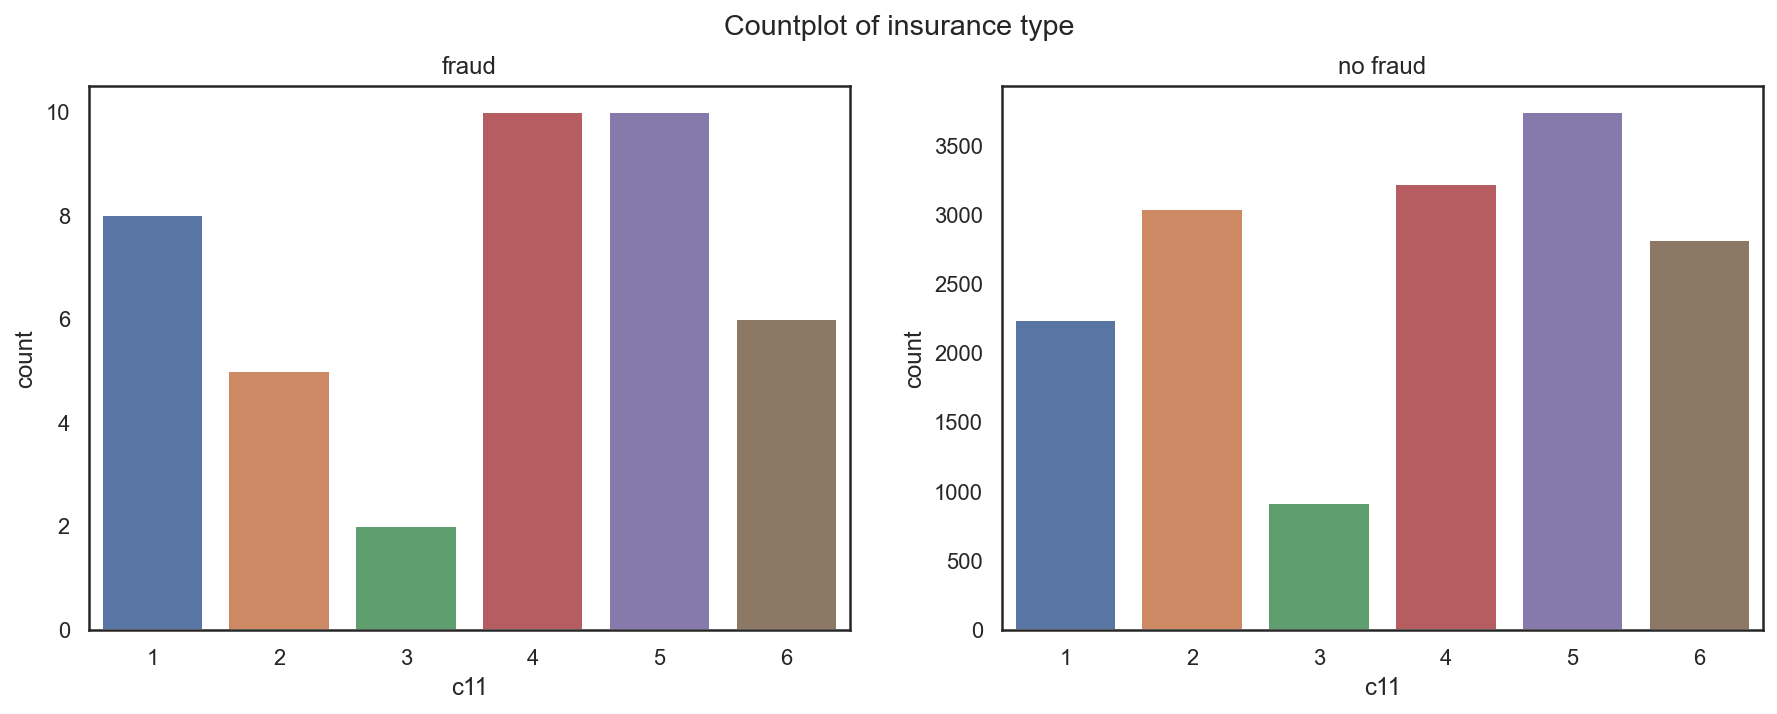

In [179]:
# c11 이용시작시간: (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c11"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c11"], ax=axs[1]).set_title("no fraud")
fig.show()

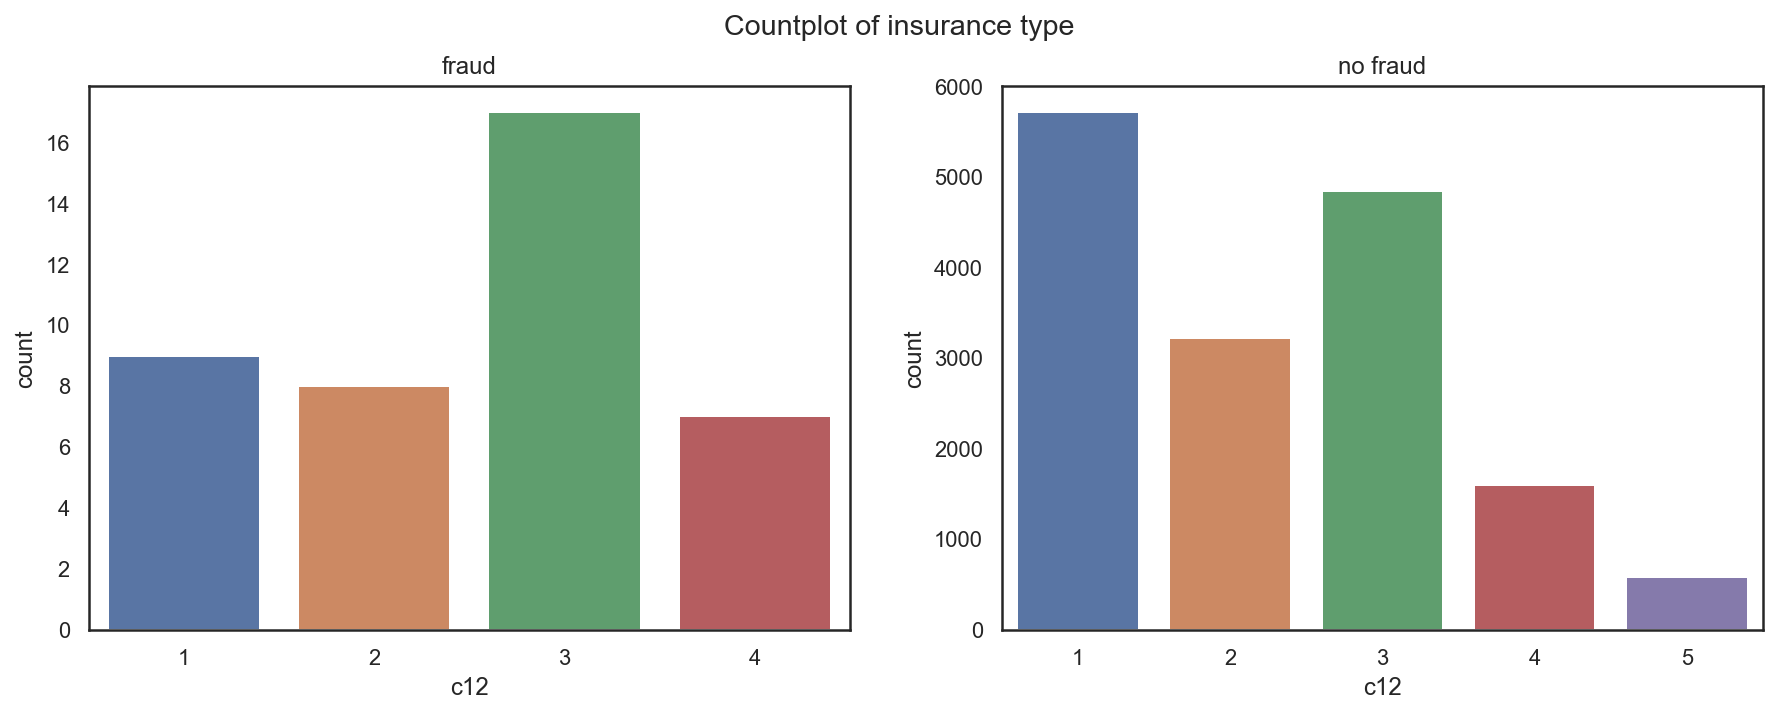

In [176]:
# c12 대여기간 (2,3,4,5) : 1 / (6,7,8,9) : 2 / (10 =< x <=36) : 3 / (36+) : 4 / (0,1) : 5
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c12"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c12"], ax=axs[1]).set_title("no fraud")
fig.show()
# 생각과 다르다...? 당황스럽네... 

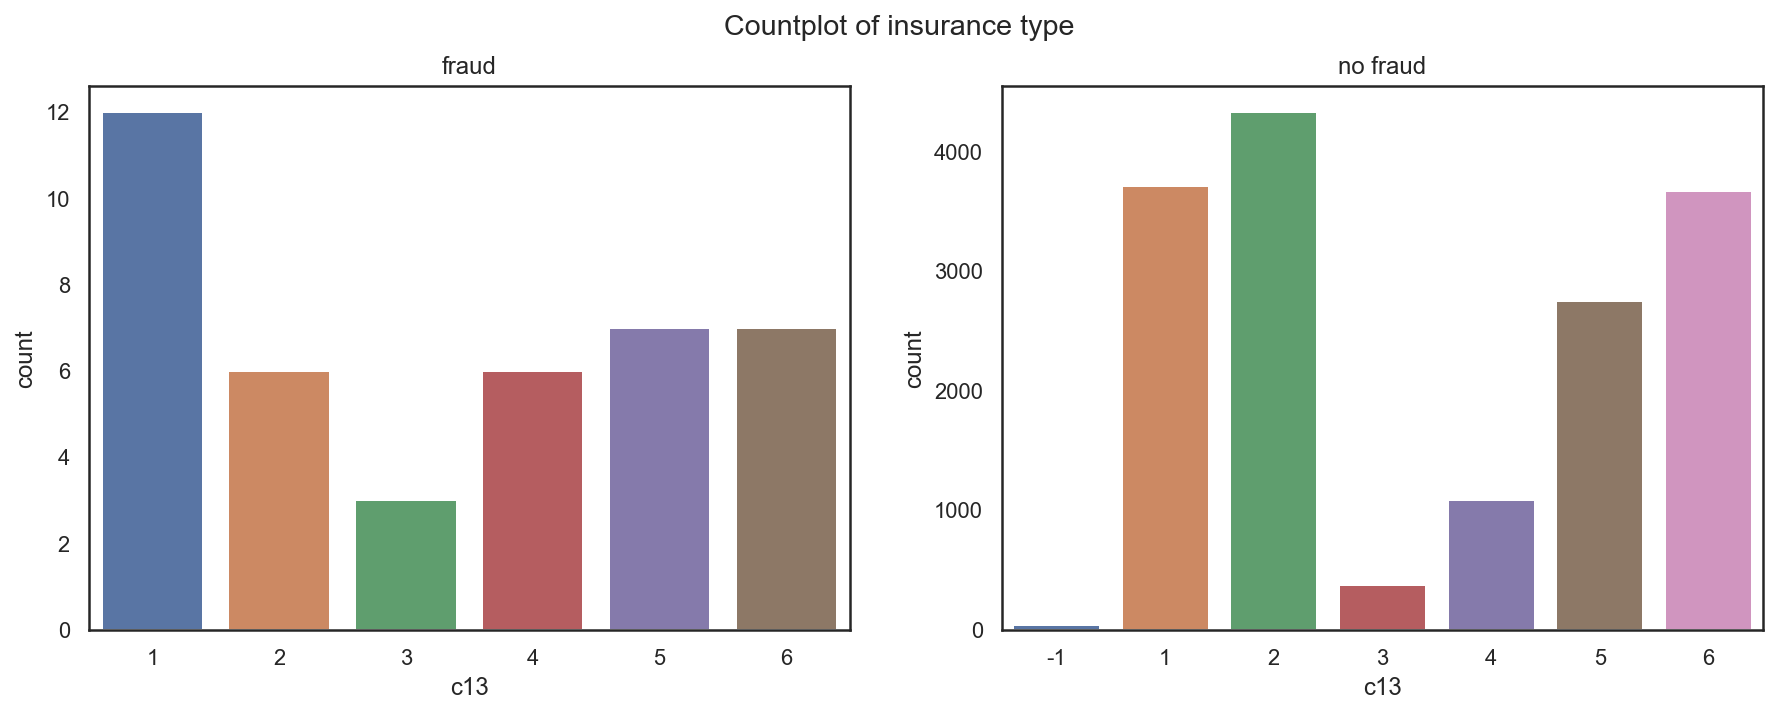

In [187]:
# c13 사고시각 (0,1,2,3,4,21,22,23) : 1 / (17,18,19,20) : 2 / (5,6,7) : 3 / (8,9,10) : 4 / (11,12,13) : 5 / (14,15,16) : 6 / else -1
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1, 2)
fig.suptitle('Countplot of insurance type')
sns.countplot(data[data["fraud"]==1]["c13"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c13"], ax=axs[1]).set_title("no fraud")
fig.show()

In [ ]:
# c14 차량수리비용

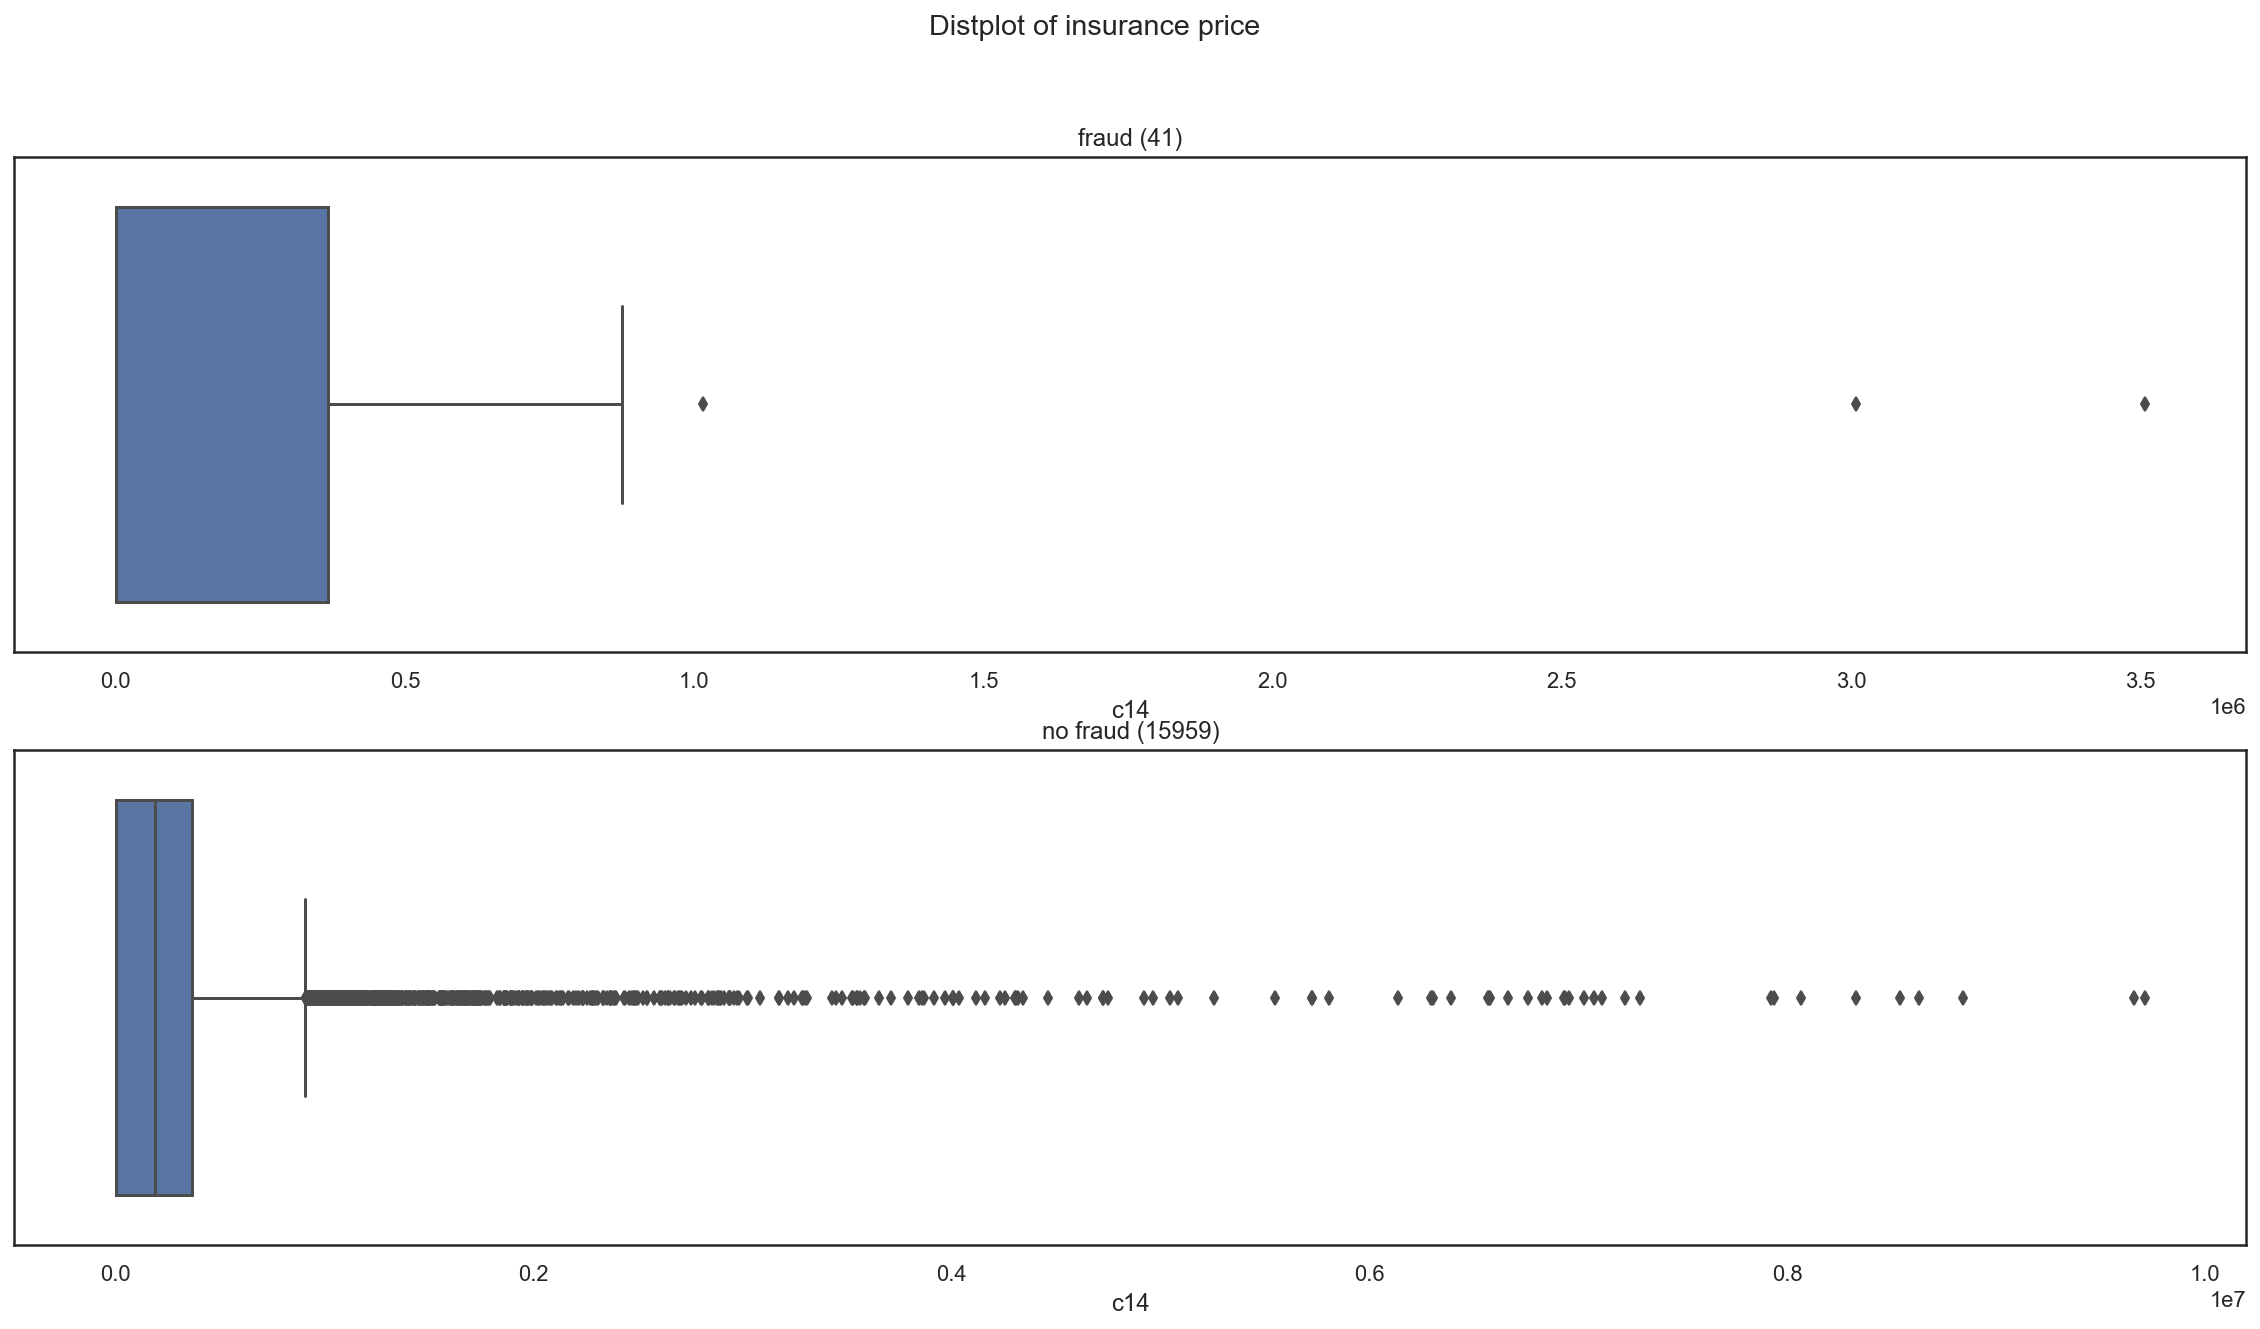

In [151]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, axs = plt.subplots(2, 1)
fig.suptitle('Distplot of insurance price')
sns.boxplot(data[data["fraud"]==1]["c14"], ax=axs[0]).set_title("fraud (41)")
sns.boxplot(data[data["fraud"]==0]["c14"], ax=axs[1]).set_title("no fraud (15959)")
fig.show()
# 아웃라이어가 많아서 여기서 아웃라이어를 다 쳐내도 될 것 같다. 

In [138]:
print("fraud mean:", np.round(data[data["fraud"]==1]["c14"].mean(),2), 
      "no fraud mean:", np.round(data[data["fraud"]==0]["c14"].mean(),2))

fraud mean: 319795.22 no fraud mean: 284922.26


In [ ]:
# c15 보험손해비용

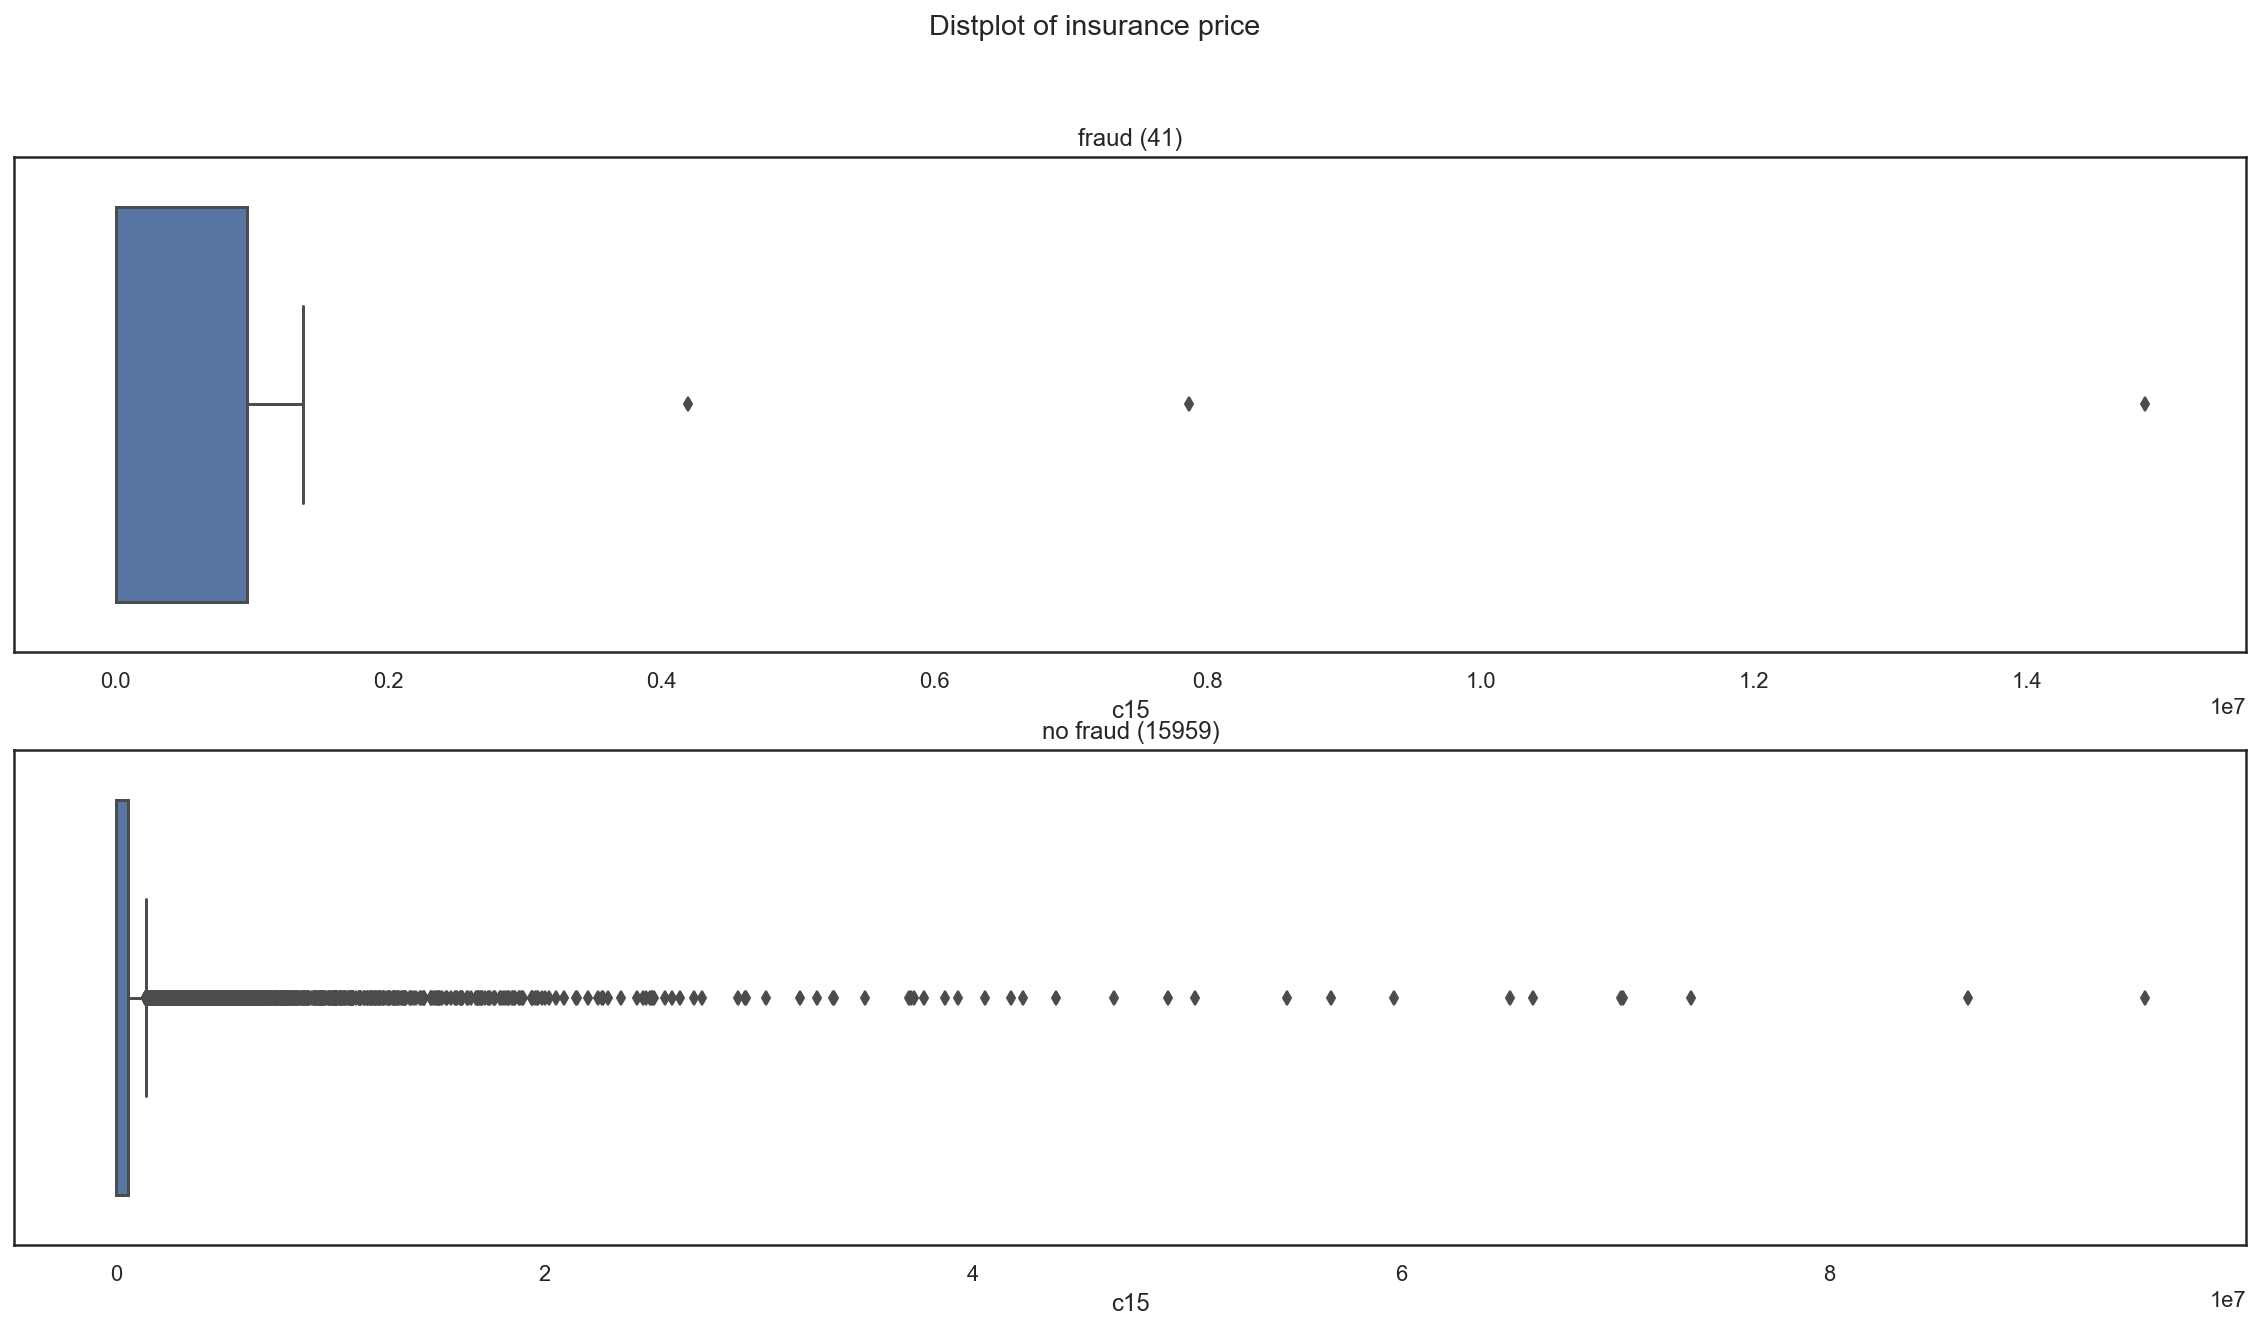

In [127]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, axs = plt.subplots(2, 1)
fig.suptitle('Distplot of insurance price')
sns.boxplot(data[data["fraud"]==1]["c15"], ax=axs[0]).set_title("fraud (41)")
sns.boxplot(data[data["fraud"]==0]["c15"], ax=axs[1]).set_title("no fraud (15959)")
fig.show()
# 아웃라이어가 많아서 여기서 아웃라이어를 다 쳐내도 될 것 같다. 

In [ ]:
# 보험사 손해비용 - 차량수리비용 d 

In [172]:
data["d"] = data["c15"]-data["c14"]

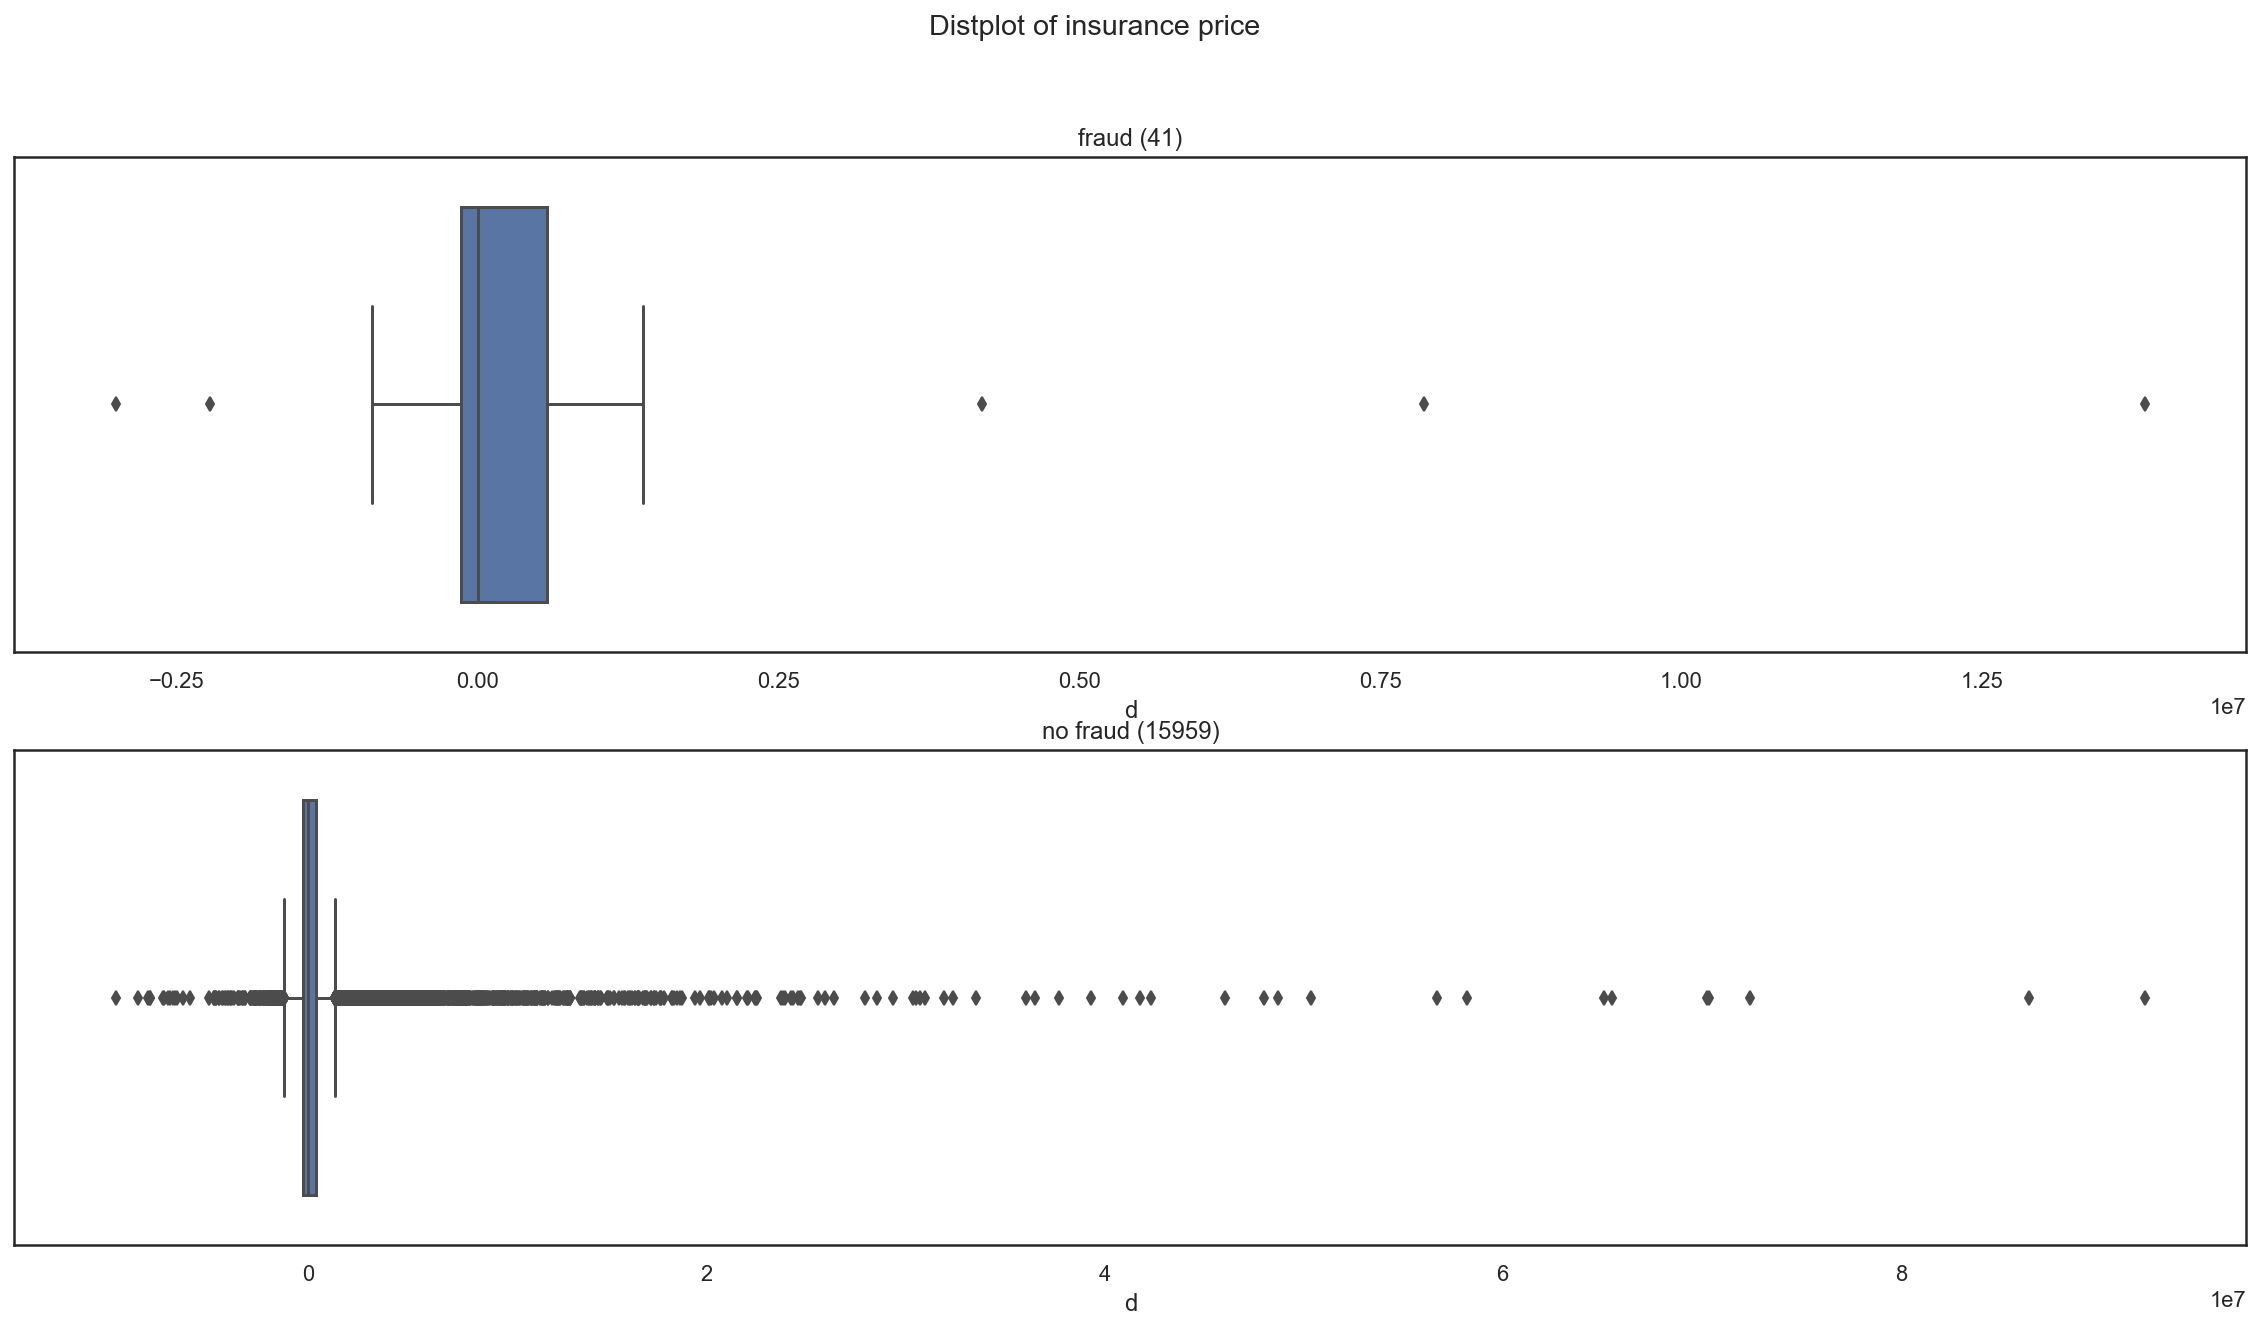

In [173]:
plt.rcParams["figure.figsize"] = [20, 10]
fig, axs = plt.subplots(2, 1)
fig.suptitle('Distplot of insurance price')
sns.boxplot(data[data["fraud"]==1]["d"], ax=axs[0]).set_title("fraud (41)")
sns.boxplot(data[data["fraud"]==0]["d"], ax=axs[1]).set_title("no fraud (15959)")
fig.show()
# 아웃라이어가 많아서 여기서 아웃라이어를 다 쳐내도 될 것 같다. 

In [175]:
print("fraud mean:", np.round(data[data["fraud"]==1]["d"].mean(),2), 
      "no fraud mean:", np.round(data[data["fraud"]==0]["d"].mean(),2))

fraud mean: 662900.17 no fraud mean: 574197.81


In [ ]:
# 다 날리자~~ 우와~~ 

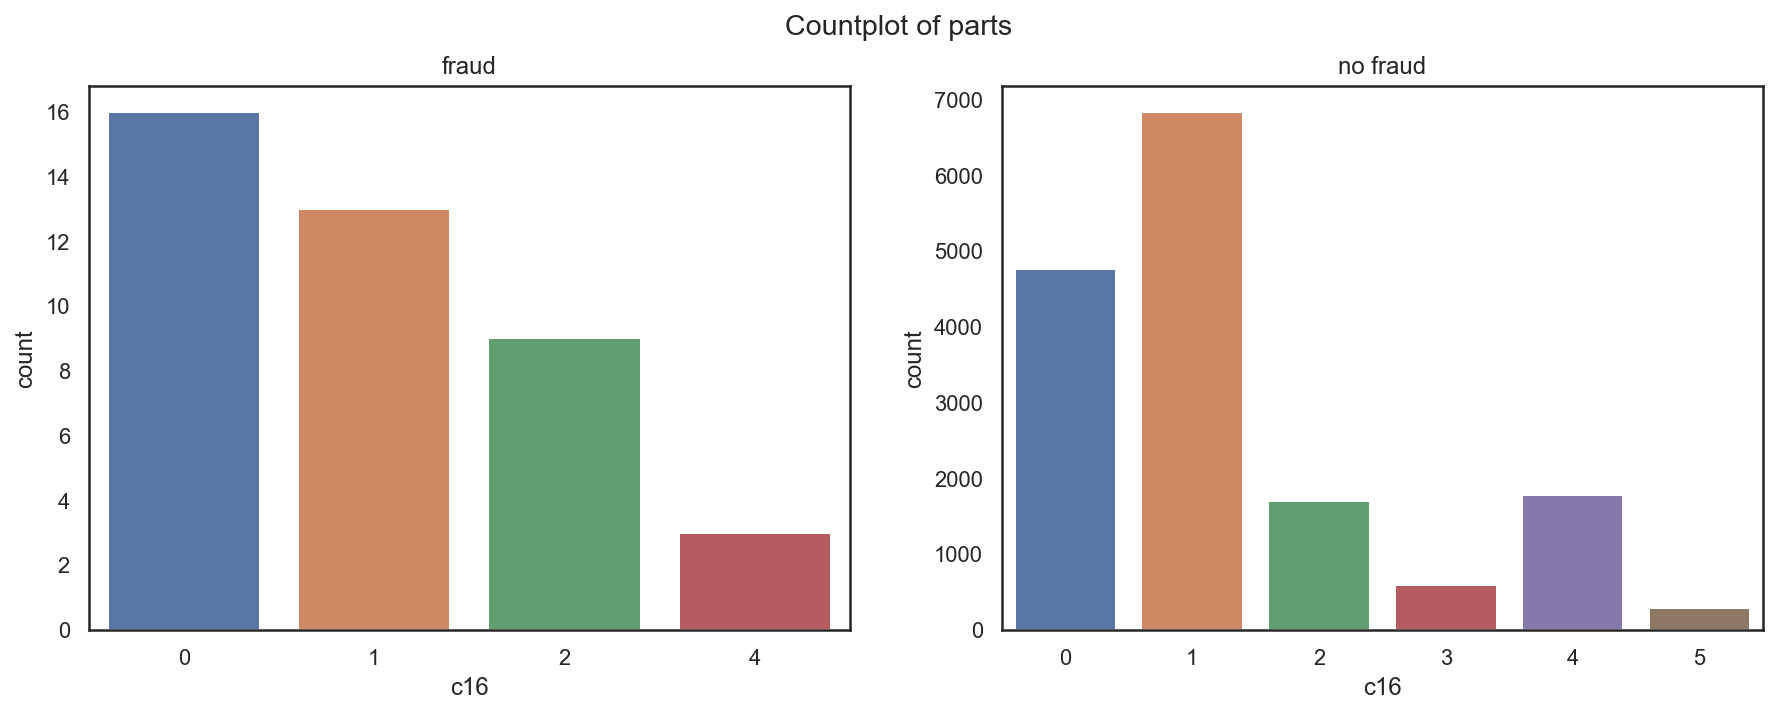

In [186]:
# c16 사고위치: 0주차장 1일반도로 2이면도로 3고속도로 4쏘카존 5확인불가
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of parts')
sns.countplot(data[data["fraud"]==1]["c16"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c16"], ax=axs[1]).set_title("no fraud")
fig.show()

In [ ]:
# c17 전면 손상 if(a1 = 1, 1, 0) a1, -- 앞범퍼
# c18 후면 손상 if(a10 = 1, 1, 0) a10, -- 뒷범퍼

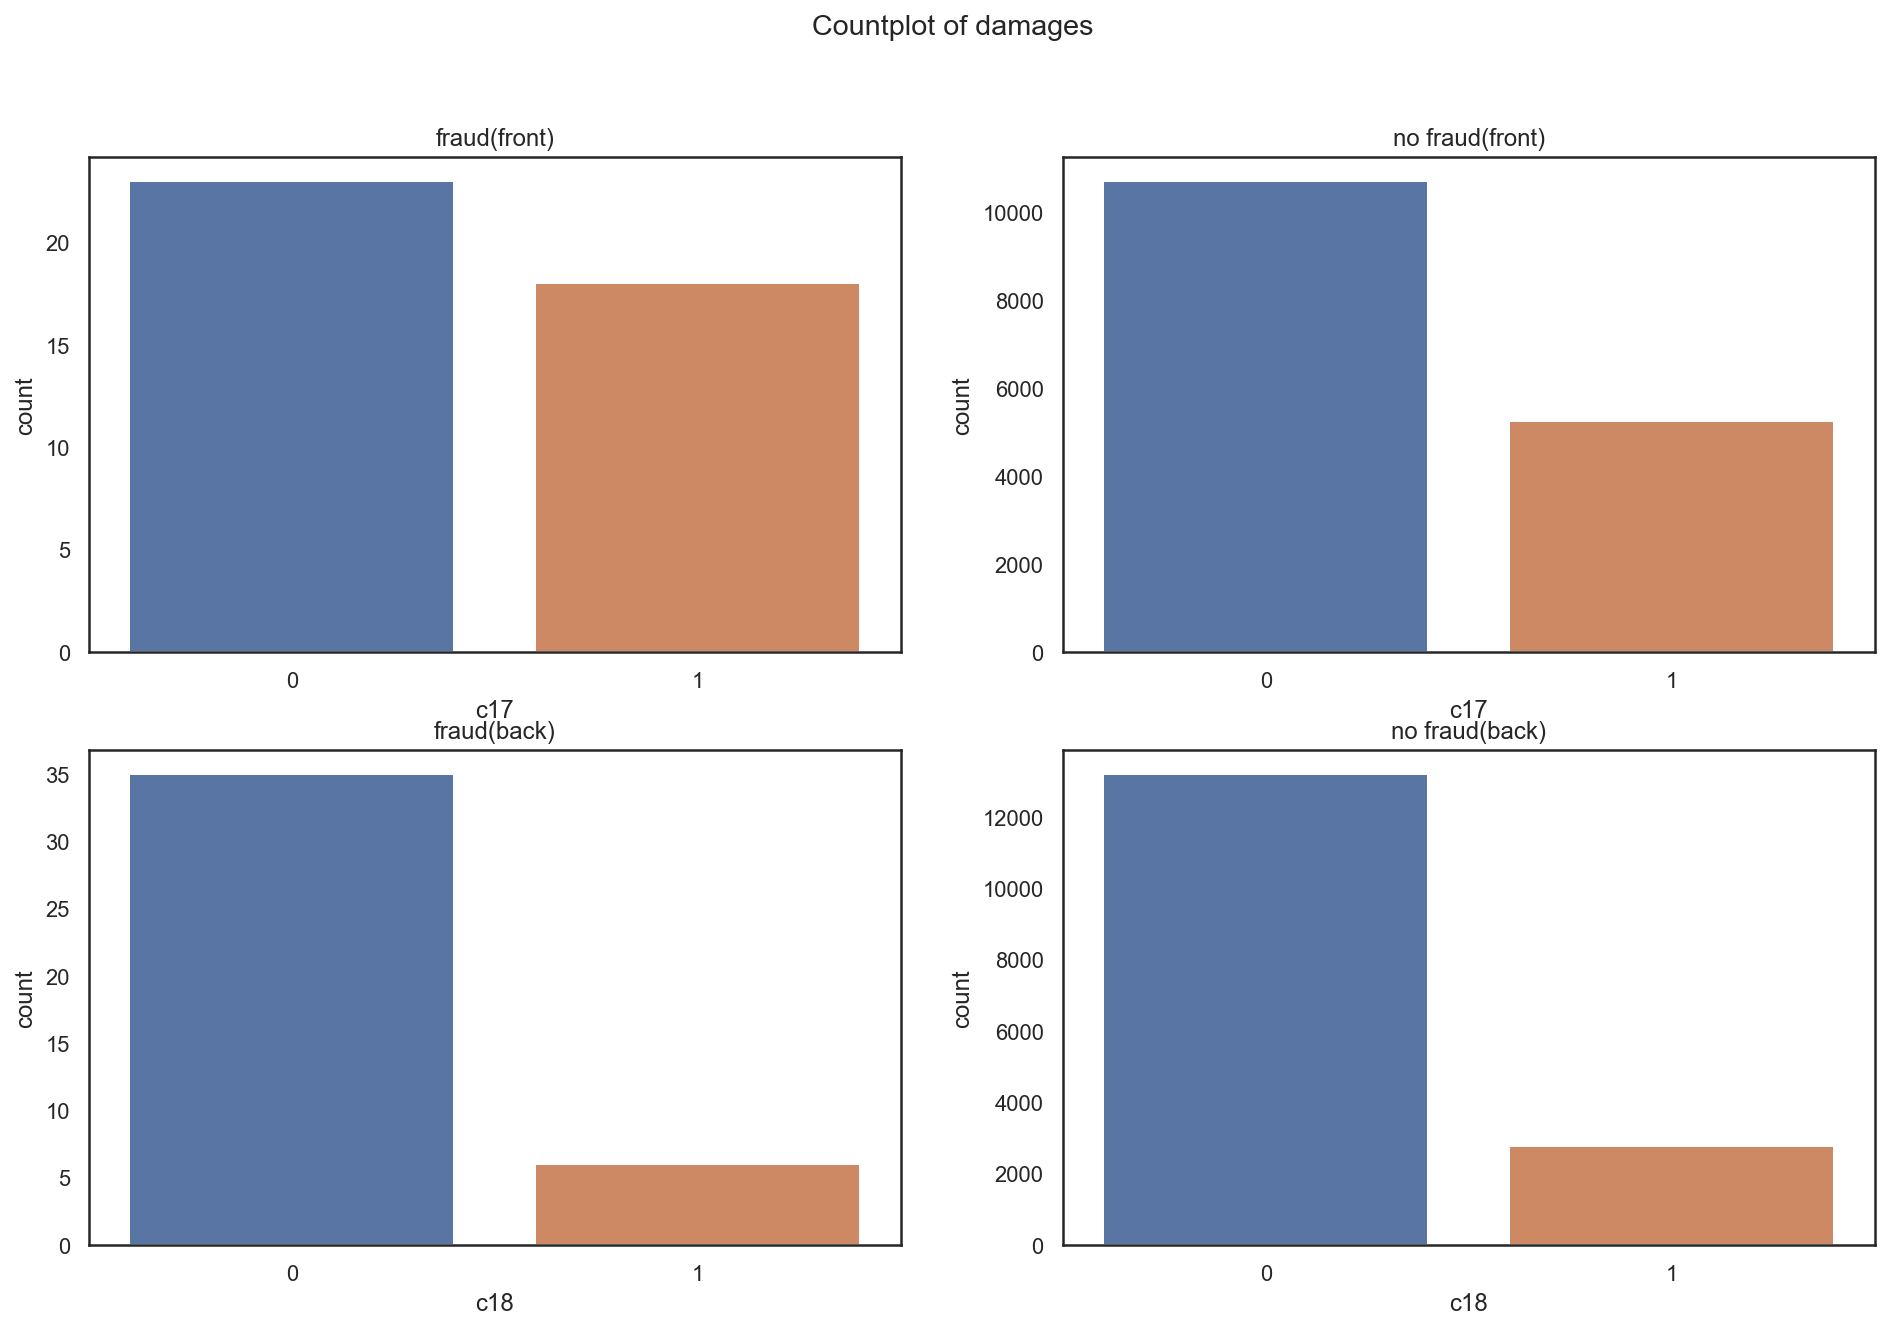

In [153]:
plt.rcParams["figure.figsize"] = [16, 10]
fig, axs = plt.subplots(2, 2)
fig.suptitle('Countplot of damages')
sns.countplot(data[data["fraud"]==1]["c17"], ax=axs[0, 0]).set_title("fraud(front)")
sns.countplot(data[data["fraud"]==0]["c17"], ax=axs[0, 1]).set_title("no fraud(front)")
sns.countplot(data[data["fraud"]==1]["c18"], ax=axs[1, 0]).set_title("fraud(back)")
sns.countplot(data[data["fraud"]==0]["c18"], ax=axs[1, 1]).set_title("no fraud(back)")
fig.show()

# 앞범퍼 손상이 높다. 중요한 컬럼이 될 것 같다. 

In [ ]:
# c19 수리 부위 갯수

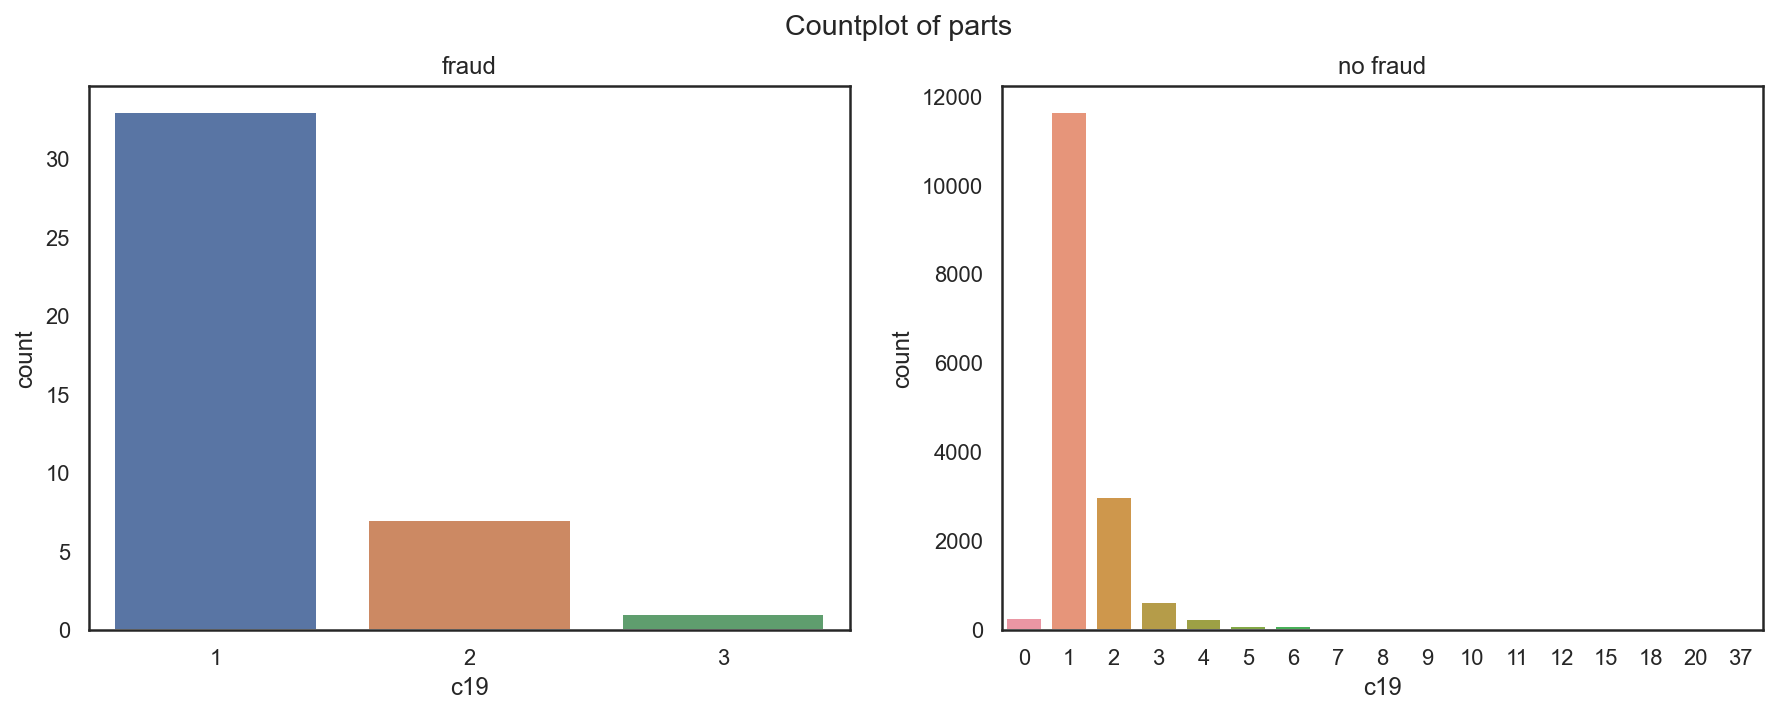

In [158]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of parts')
sns.countplot(data[data["fraud"]==1]["c19"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c19"], ax=axs[1]).set_title("no fraud")
fig.show()

# fraud의 수리 부위 갯수는 1-3밖에 없는 것이 의미가 있을까?! 

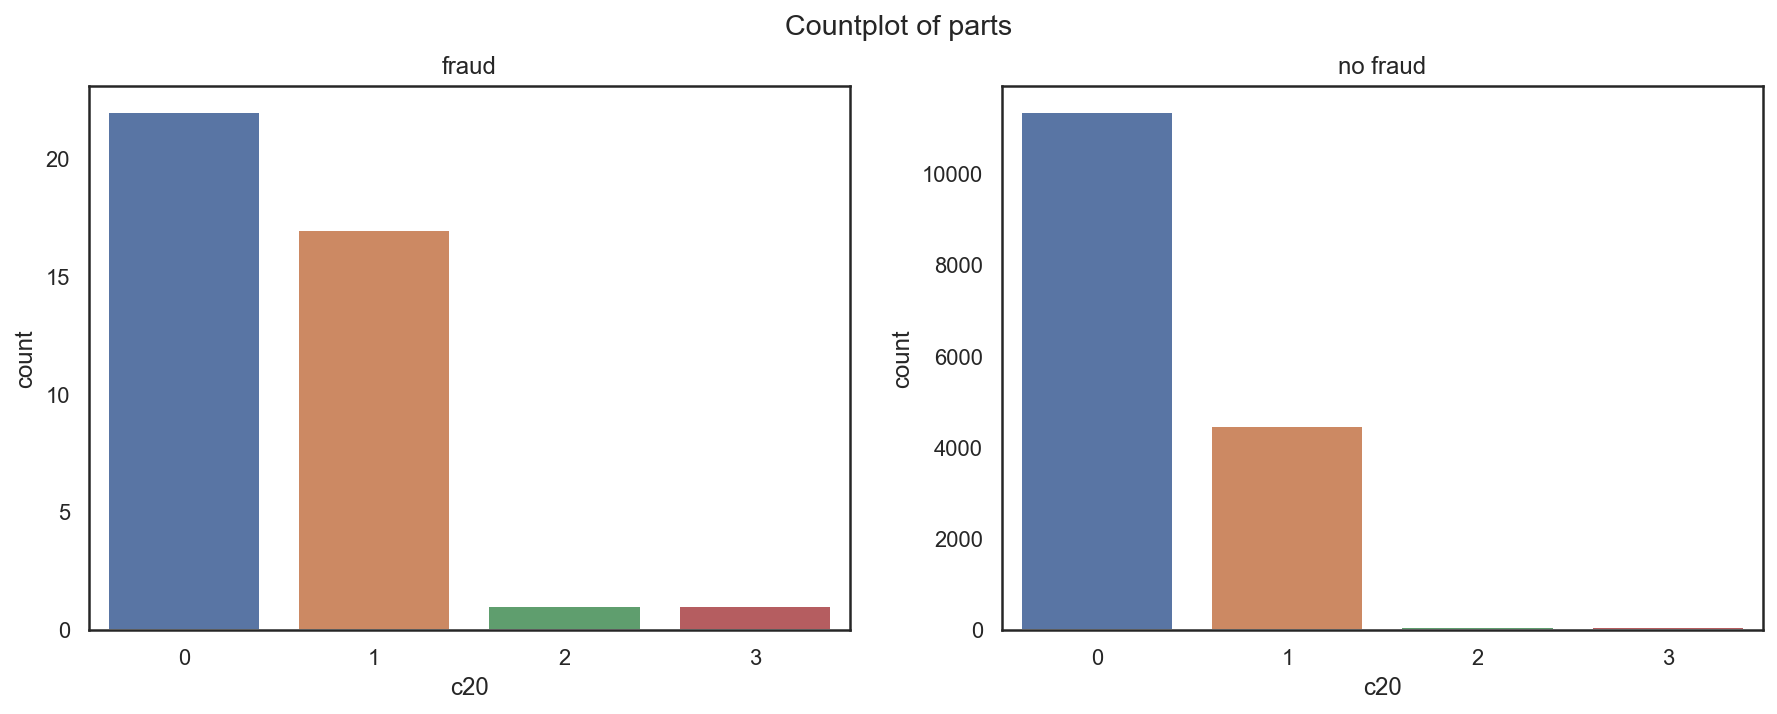

In [180]:
# c20 사고타입: 사고 유형1 : 차대인(10) 차대차(20) 차량단독(30) 보행중(40) 자전거(50) 기타(99)
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of parts')
sns.countplot(data[data["fraud"]==1]["c20"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c20"], ax=axs[1]).set_title("no fraud")
fig.show()

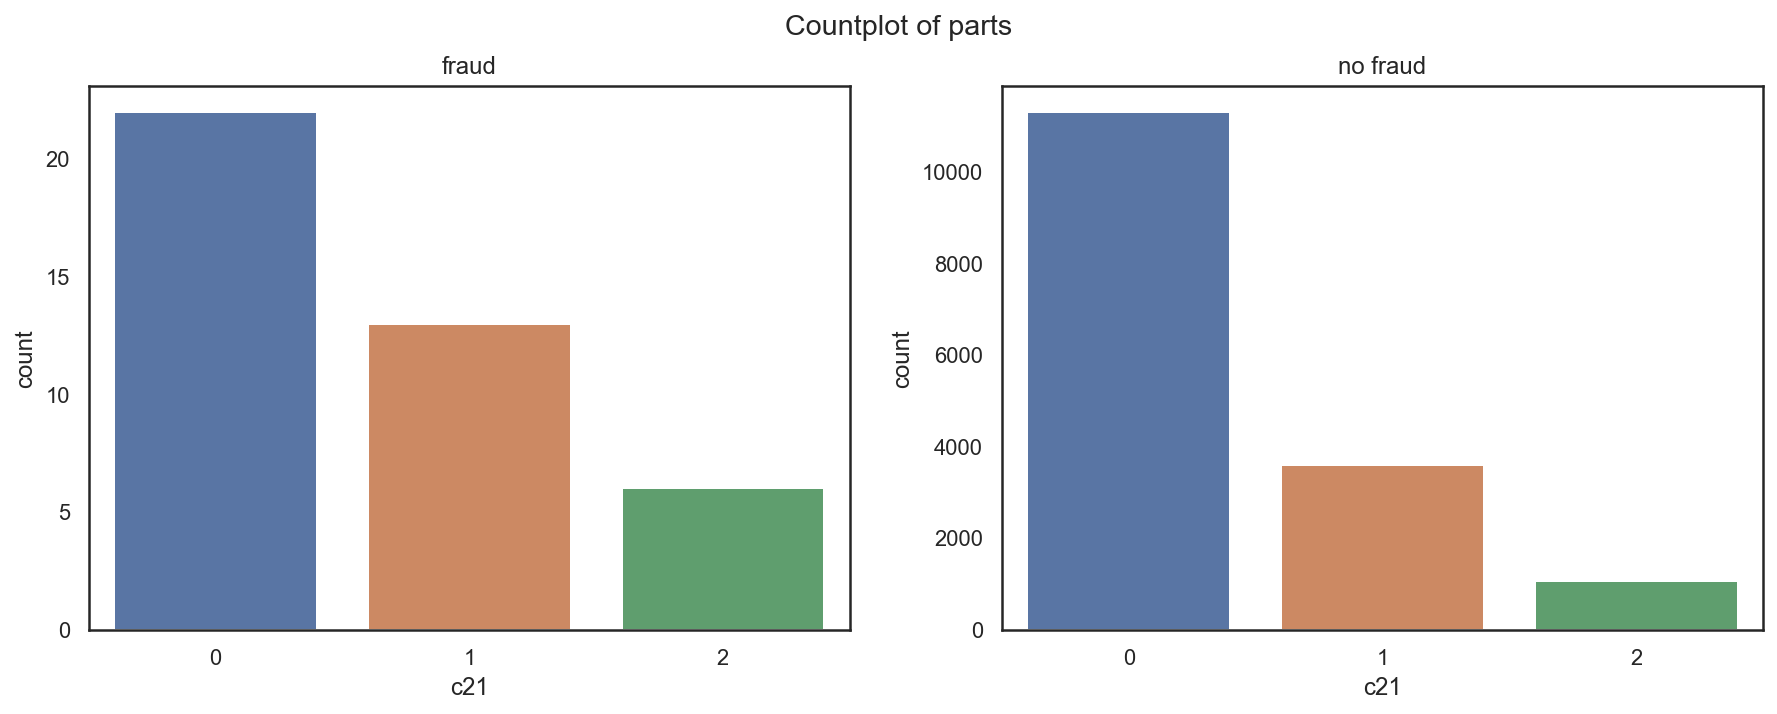

In [185]:
# c21 보험사 현장출동 유무 Yes 1 no 2 else 0 
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of parts')
sns.countplot(data[data["fraud"]==1]["c21"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c21"], ax=axs[1]).set_title("no fraud")
fig.show()

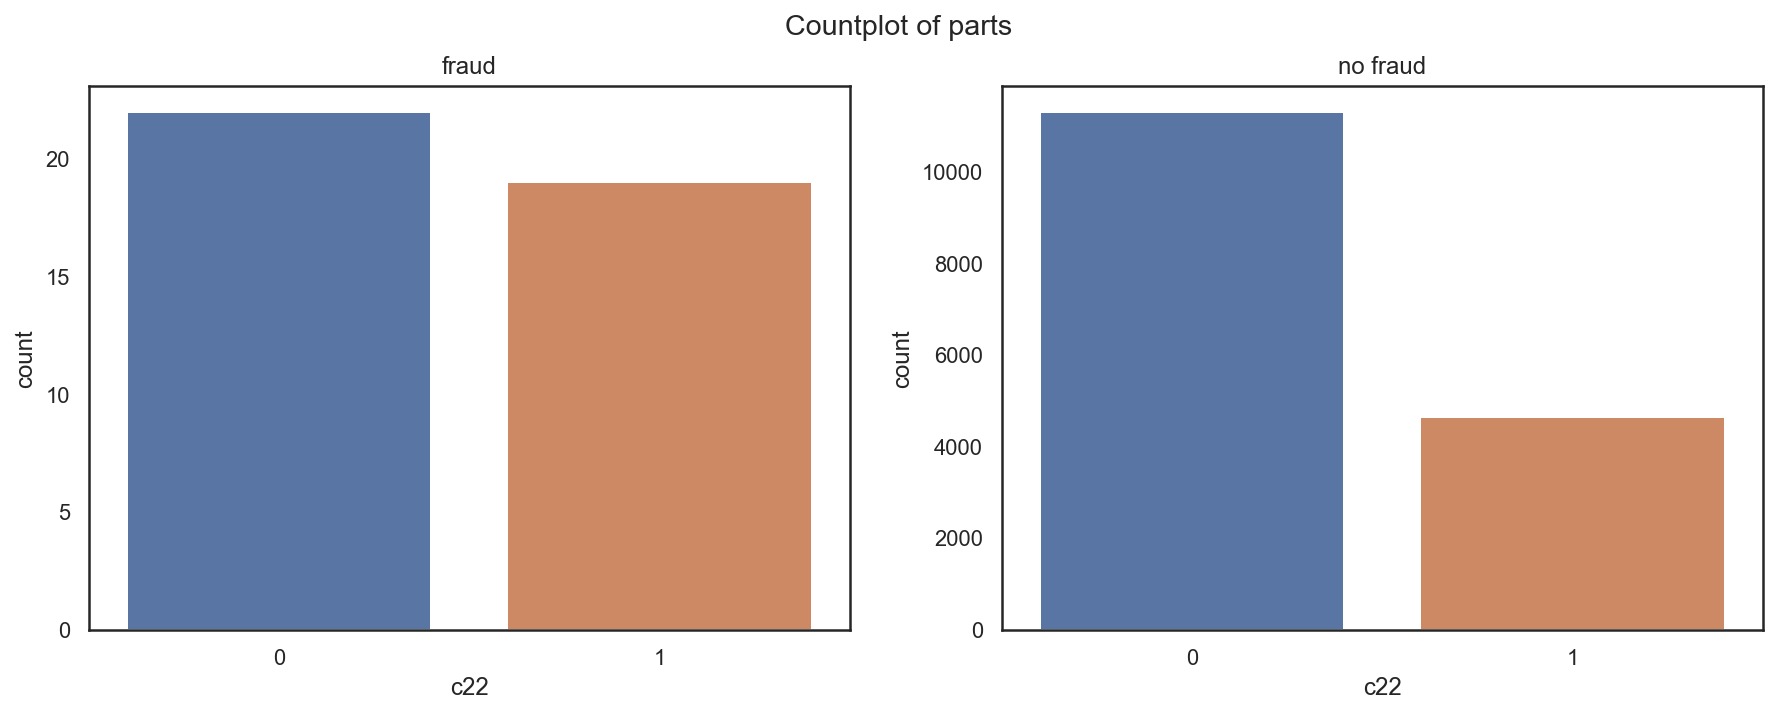

In [181]:
# c22 경찰 현장출동 유무 1 미신고 / 2 신고 / else 0
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of parts')
sns.countplot(data[data["fraud"]==1]["c22"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c22"], ax=axs[1]).set_title("no fraud")
fig.show()

In [184]:
data[data["c22"] == 2]  # 경찰을 아무도 안 불렀다???

,fraud,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c16,c17,c18,c19,c20,c21,c22,c23,c24,d


In [ ]:
# c23 우리차 탑승 인원 ("0","1","2","3","4"), 5이상: 5, 미확인=-1 

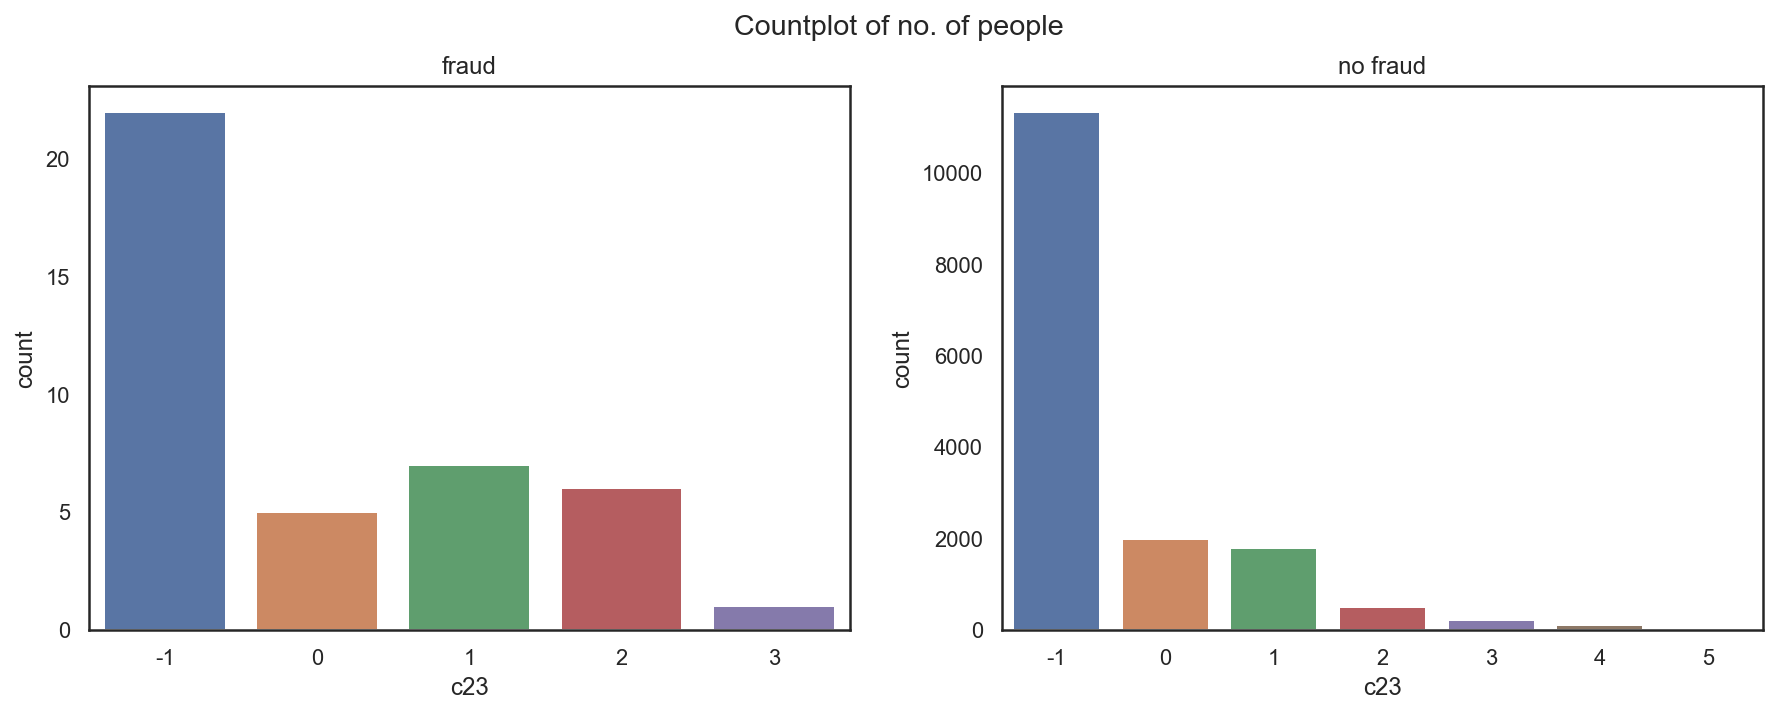

In [160]:
plt.rcParams["figure.figsize"] = [15, 5]
fig, axs = plt.subplots(1,2)
fig.suptitle('Countplot of no. of people')
sns.countplot(data[data["fraud"]==1]["c23"], ax=axs[0]).set_title("fraud")
sns.countplot(data[data["fraud"]==0]["c23"], ax=axs[1]).set_title("no fraud")
fig.show()